In [1]:
import sys 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

sys.path.append('/Users/Isaac/Desktop/repos')

In [2]:
from helper_class import clean_headers
from scipy.stats import shapiro

In [3]:
def warn(*args, **kwargs):
    pass

In [4]:
warnings.warn = warn

In [5]:
dataset = pd.read_csv('CPI2023-Global-Results-Trends.csv', delimiter='|', encoding='utf-8') 

In [6]:
dataset_timeseries = pd.read_csv('CPI2023_Global_Results_Trends_CPI_Timeseries_2012_2023.csv', header = None, skiprows = 3)
dataset_timeseries.columns = dataset_timeseries.iloc[0]
dataset_timeseries = dataset_timeseries.drop(dataset_timeseries.index[0])
dataset_timeseries.reset_index(drop = True, inplace = True)

In [7]:
dataset = clean_headers(dataset)

In [8]:
numeric_dtypes_df = dataset.select_dtypes(include = ['float64', 'int64'])

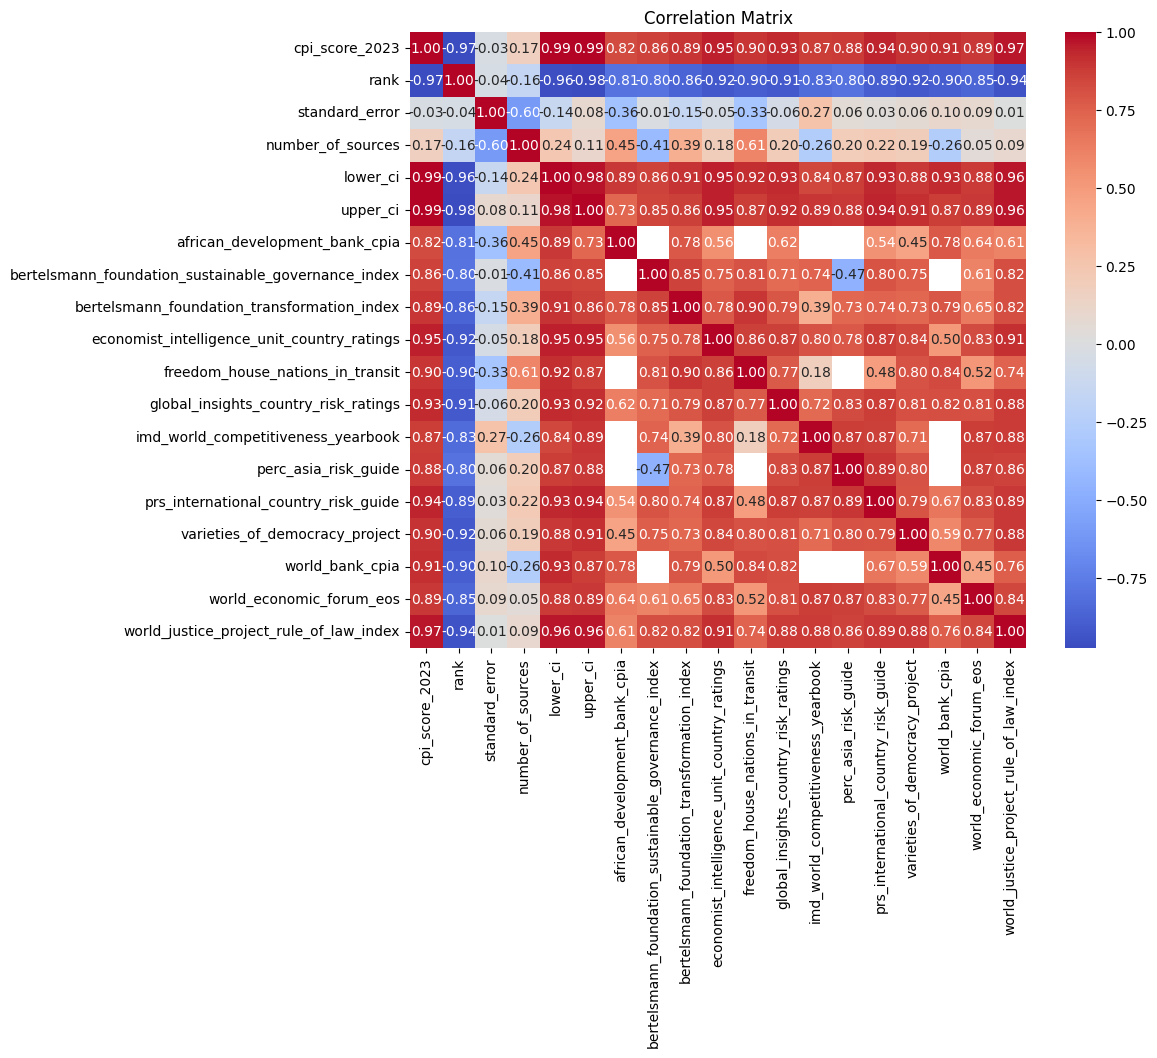

In [9]:
corr_matrix = numeric_dtypes_df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm', cbar = True, square = True)
plt.title('Correlation Matrix')
plt.show()

<h1>Corruption Perception Index</h1>

<p>What is Corruption Perception Index?</p>

<p>-- The Corruption Perceptions Index (CPI) is an annual ranking of 180 countries and territories based on their perceived levels of public sector corruption. The CPI uses a scale of 0–100, with 0 being highly corrupt and 100 being very clean.

-- The CPI defines corruption as "an abuse of entrusted power for private gain".</p>

In [10]:
americas_region = dataset[dataset.region == 'AME']

<p>Below shows the Carribean North/Central/ South American Countries in this dataset their world Corruption ranking our of the 180 Countries in this dataset </p>

In [11]:
americas_region.rename(columns = {'rank':'world_rank','standard_error':'plus_minus_cpi_standardError'}, inplace = True)

In [12]:
americas_region[['country__territory', 'world_rank', 'cpi_score_2023', 'plus_minus_cpi_standardError','number_of_sources']].sort_values(by = 'world_rank', ascending = True)

country__territory  world_rank  cpi_score_2023  \
11                             Canada          12              76   
17                            Uruguay          16              73   
23                           Barbados          24              69   
24                      United States          24              69   
28                              Chile          29              66   
29                            Bahamas          30              64   
36   Saint Vincent and the Grenadines          36              60   
41                           Dominica          42              56   
44                         Costa Rica          45              55   
45                        Saint Lucia          45              55   
50                            Grenada          49              53   
68                            Jamaica          69              44   
77                               Cuba          76              42   
81                Trinidad and Tobago          76              42   
89                           Suriname          87              40   
88                             Guyana          87              40   
86                           Colombia          87              40   
98                          Argentina          98              37   
104                            Brazil         104              36   
108                Dominican Republic         108              35   
111                            Panama         108              35   
114                           Ecuador         115              34   
122                              Peru         121              33   
125                       El Salvador         126              31   
127                            Mexico         126              31   
132                           Bolivia         133              29   
138                          Paraguay         136              28   
154                         Guatemala         154              23   
155                          Honduras         154              23   
172                             Haiti         172              17   
174                         Nicaragua         172              17   
178                         Venezuela         177              13   

     plus_minus_cpi_standardError  number_of_sources  
11                       1.725637                  8  
17                       0.672926                  7  
23                       3.366726                  3  
24                       2.142744                  9  
28                       1.540951                  9  
29                       5.470350                  3  
36                       4.262700                  3  
41                       1.914757                  3  
44                       2.899478                  7  
45                       3.700181                  3  
50                       3.736033                  3  
68                       3.061407                  7  
77                       3.457847                  5  
81                       4.874883                  6  
89                       5.908999                  4  
88                       2.313902                  5  
86                       1.423581                  8  
98                       2.046685                  8  
104                      1.466162                  8  
108                      1.621773                  7  
111                      1.171405                  7  
114                      1.475489                  7  
122                      1.402434                  8  
125                      1.256549                  7  
127                      1.560548                  9  
132                      2.310445                  7  
138                      1.836820                  6  
154                      1.362267                  7  
155                      0.534971                  8  
172                      1.324690                  6  
174                      0.957145   

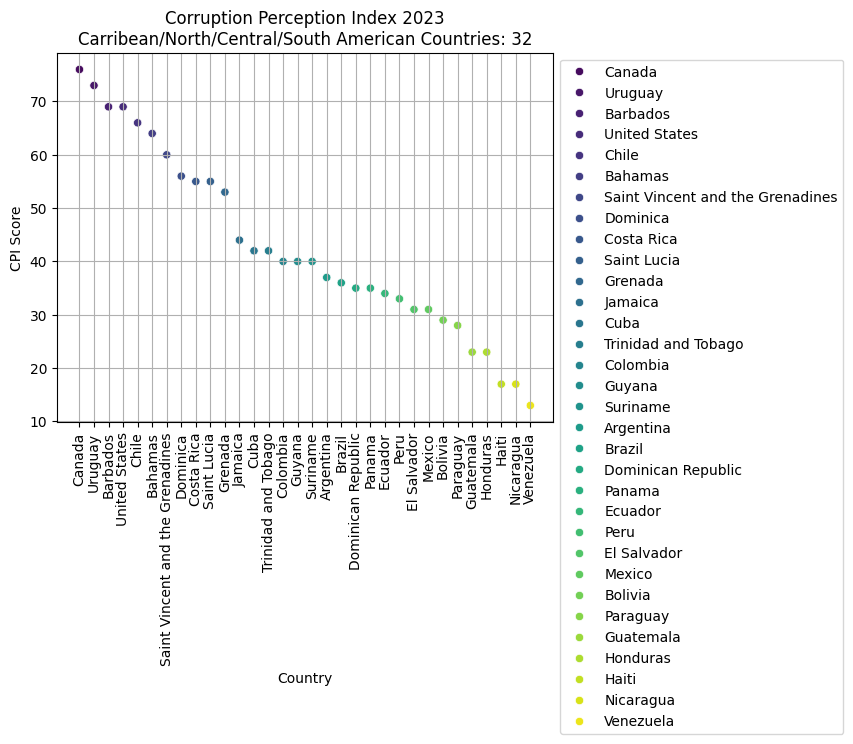

In [13]:
num_countries = len(americas_region.country__territory)

sns.scatterplot(data = americas_region, x = 'country__territory', y = 'cpi_score_2023', hue = 'country__territory', palette = 'viridis')
plt.title(f'Corruption Perception Index 2023\nCarribean/North/Central/South American Countries: {num_countries}')
plt.xlabel('Country')
plt.ylabel('CPI Score')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor = (1,1))
plt.grid(True)
plt.show()

<p>Using the Shapiro test to test the normality of the Distribution</p>
<p>For <span style = 'color:blue'>Statistics</span>, the closer it is to 1 means the data is closely aligned with a normal distribution.

For <span style = 'color:blue'>p_value</span>, since it is greater than .05, we cannot not reject the null hypothesis. No statistical reson to believe the data doesnt follow a normal distribution
</p>

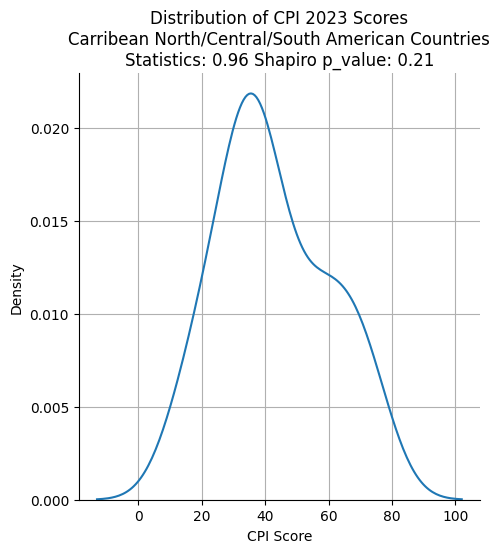

In [14]:
stat, p_value = shapiro(americas_region.cpi_score_2023)

sns.displot(data = americas_region, x = 'cpi_score_2023', kind = 'kde')
plt.title(f'Distribution of CPI 2023 Scores\nCarribean North/Central/South American Countries\nStatistics:{stat: .2f} Shapiro p_value:{p_value: .2f}')
plt.xlabel('CPI Score')
plt.grid(True)
plt.show()

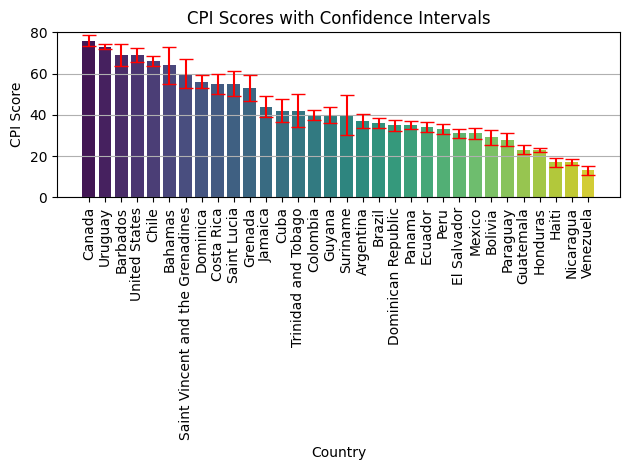

In [15]:
americas_region['errors'] = (americas_region['upper_ci'] - americas_region['lower_ci']) / 2

sns.barplot(data=americas_region, x='country__territory', y='cpi_score_2023', hue = 'country__territory', palette='viridis')

x_positions = range(len(americas_region['country__territory']))

plt.errorbar(x=x_positions, y=americas_region['cpi_score_2023'], yerr=americas_region['errors'], fmt='none', ecolor='red', capsize=5)

plt.title('CPI Scores with Confidence Intervals')
plt.xticks(rotation=90)
plt.ylabel('CPI Score')
plt.xlabel('Country')
plt.ylim(0, 80)
plt.grid(True, axis='y') 
plt.tight_layout()
plt.show()

<h1>Time Series</h1>

In [16]:
dataset_timeseries = clean_headers(dataset_timeseries)

In [18]:
americas_region_timeseries = dataset_timeseries[dataset_timeseries.region == 'AME']

<p>CPI Time Series<p>

In [19]:
cpi_columns = [col for col in americas_region_timeseries.columns if 'cpi_score' in col]
base_columns = ['country__territory', 'iso3', 'region']

timeseries_long = pd.melt(americas_region_timeseries,
                          id_vars = base_columns,
                         value_vars = cpi_columns,
                         var_name = 'year',
                         value_name = 'cpi_score')

timeseries_long['year'] = timeseries_long['year'].str.extract('(\d+)$').astype(int)

timeseries_long.sort_values(by = ['country__territory', 'year'], inplace = True)
timeseries_long.reset_index(drop = True, inplace = True)

In [20]:
timeseries_long['year'] = timeseries_long['year'].astype(int)
timeseries_long['cpi_score'] = pd.to_numeric(timeseries_long['cpi_score'], errors = 'coerce')

timeseries_long.sort_values(by = ['country__territory', 'year'], inplace = True)

<p>Rank Time Series</p>

In [24]:
rank_cpi_columns = [col for col in americas_region_timeseries.columns if 'rank_' in col]
rank_base_columns = ['country__territory', 'iso3', 'region']

timeseries_rank = pd.melt(americas_region_timeseries,
                          id_vars = rank_base_columns,
                          value_vars = rank_cpi_columns,
                          var_name = 'year',
                          value_name = 'rank')

timeseries_rank['year'] = timeseries_rank['year'].str.extract('(\d+)$').astype(int)

timeseries_rank.sort_values(by = ['country__territory', 'year'], inplace = True)
timeseries_rank.reset_index(drop = True, inplace = True)

In [25]:
timeseries_rank['year'] = timeseries_rank['year'].astype(int)
timeseries_rank['rank'] = pd.to_numeric(timeseries_rank['rank'], errors = 'coerce')

timeseries_rank.sort_values(by = ['country__territory', 'year'], inplace = True)

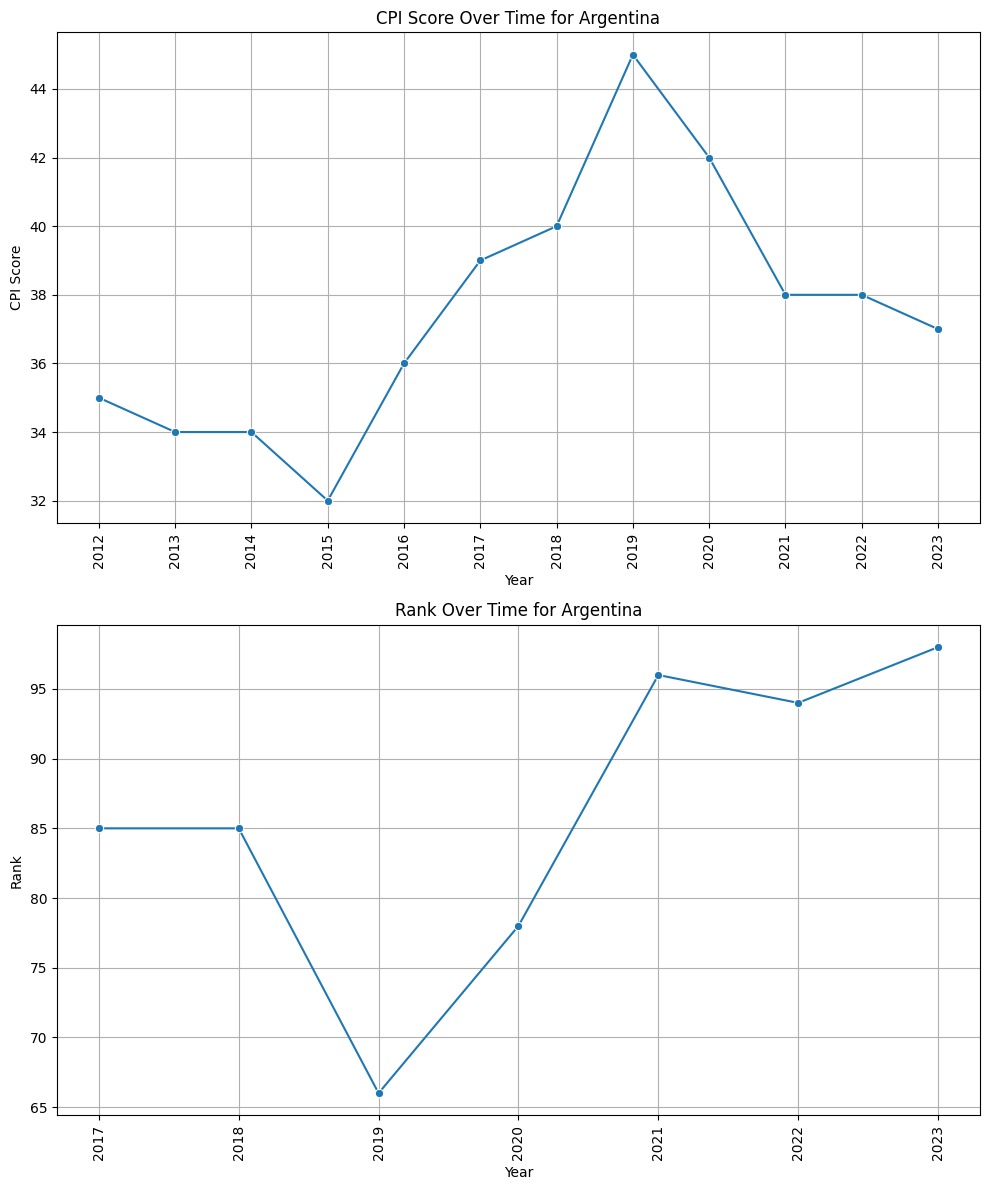

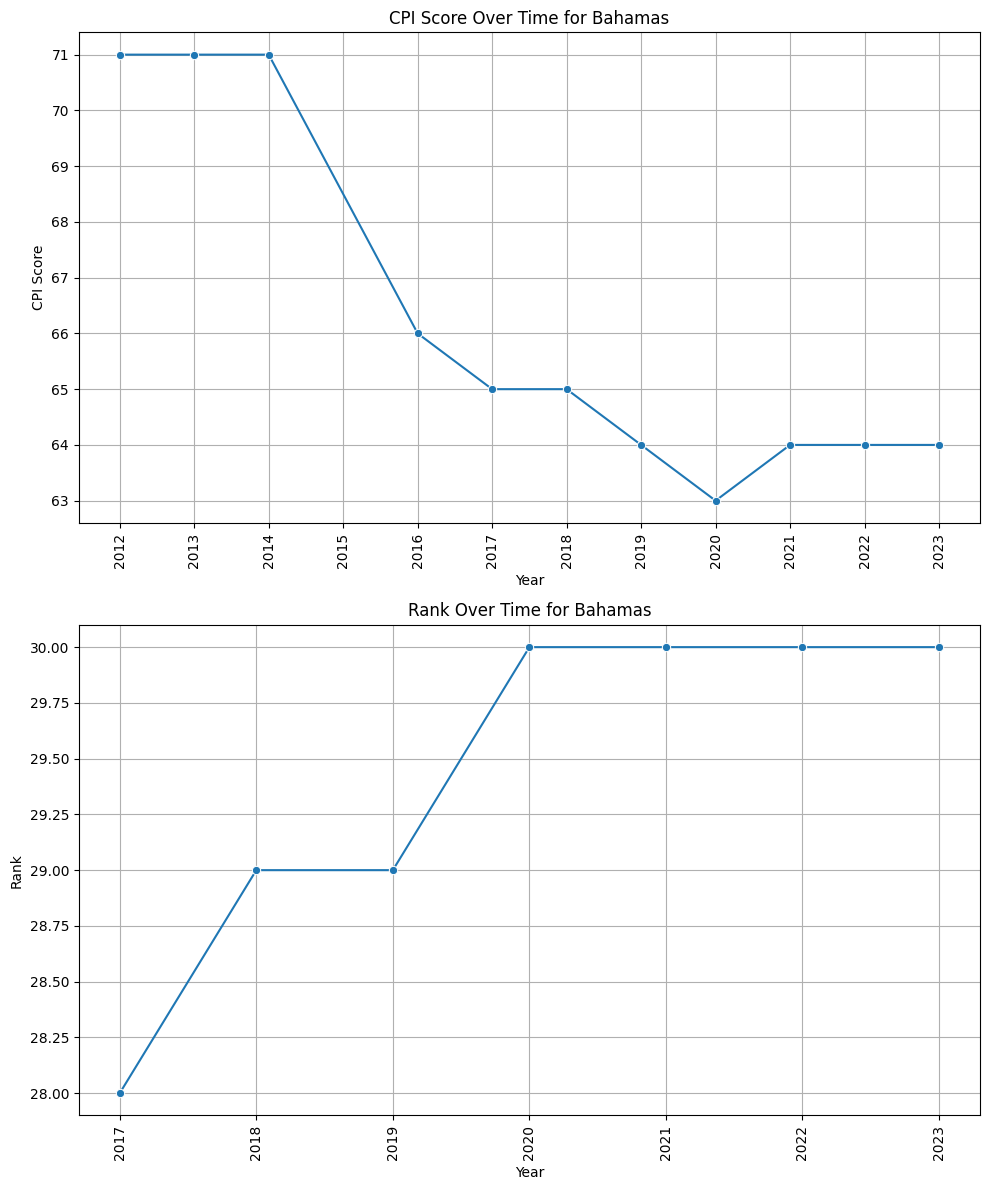

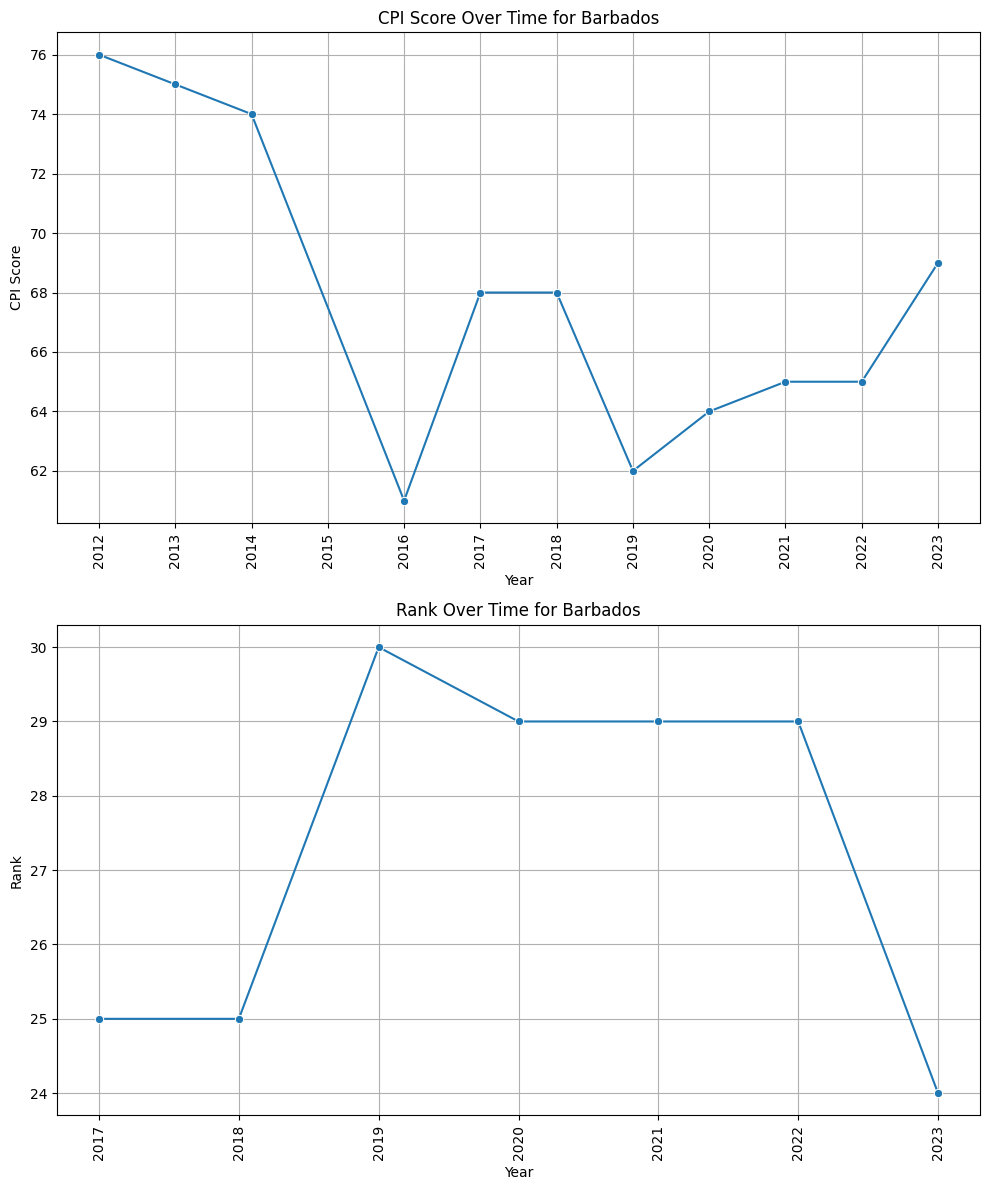

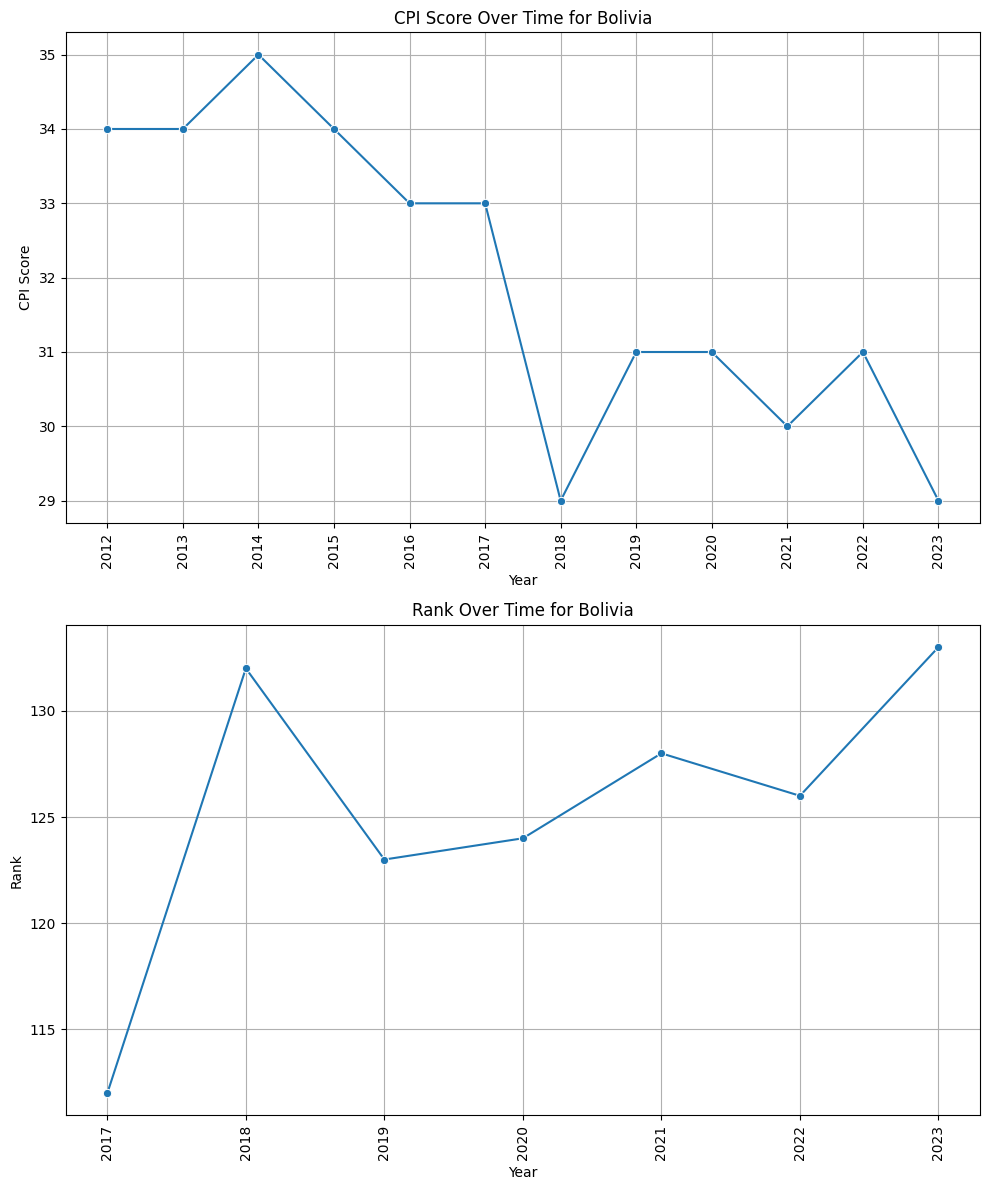

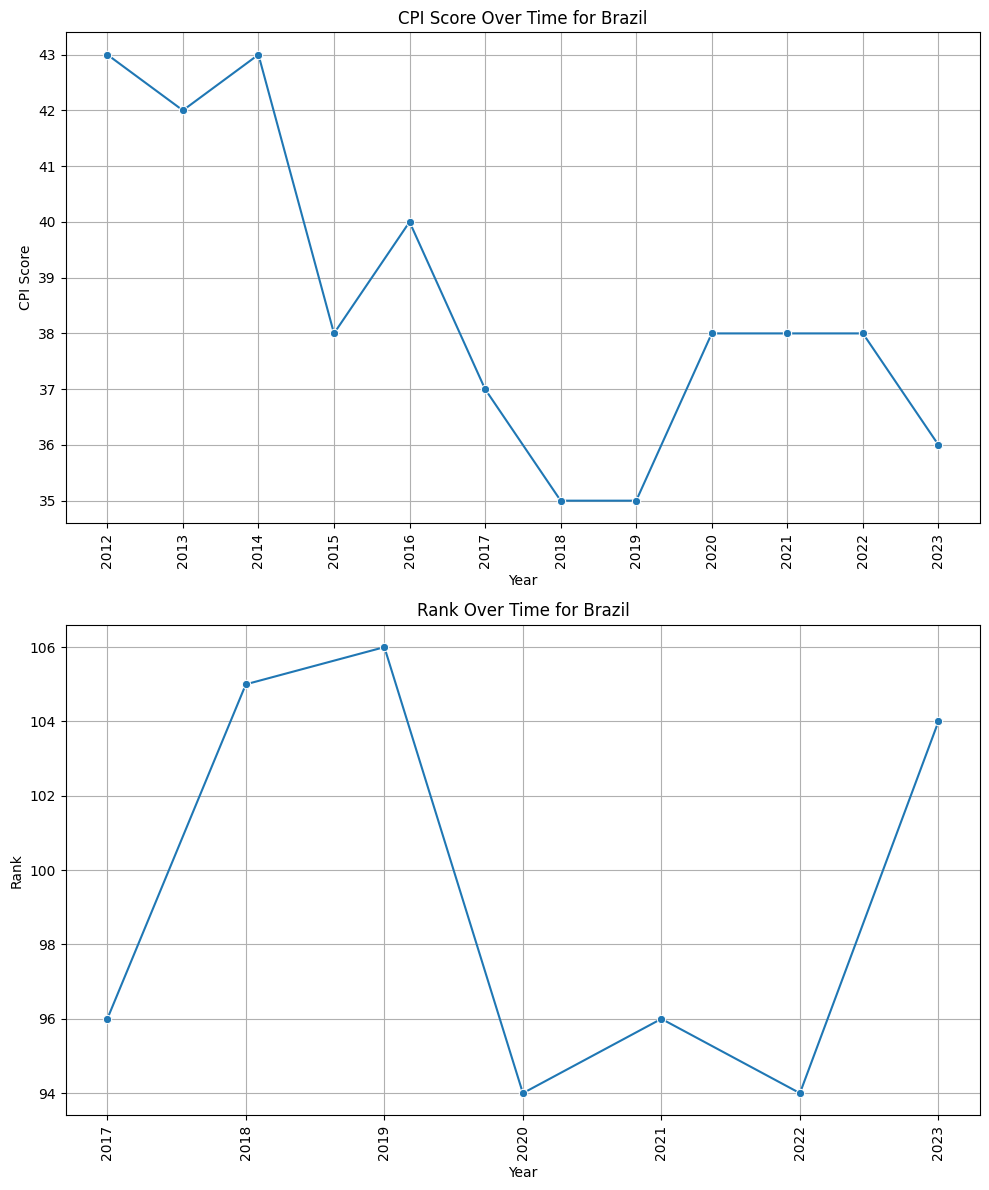

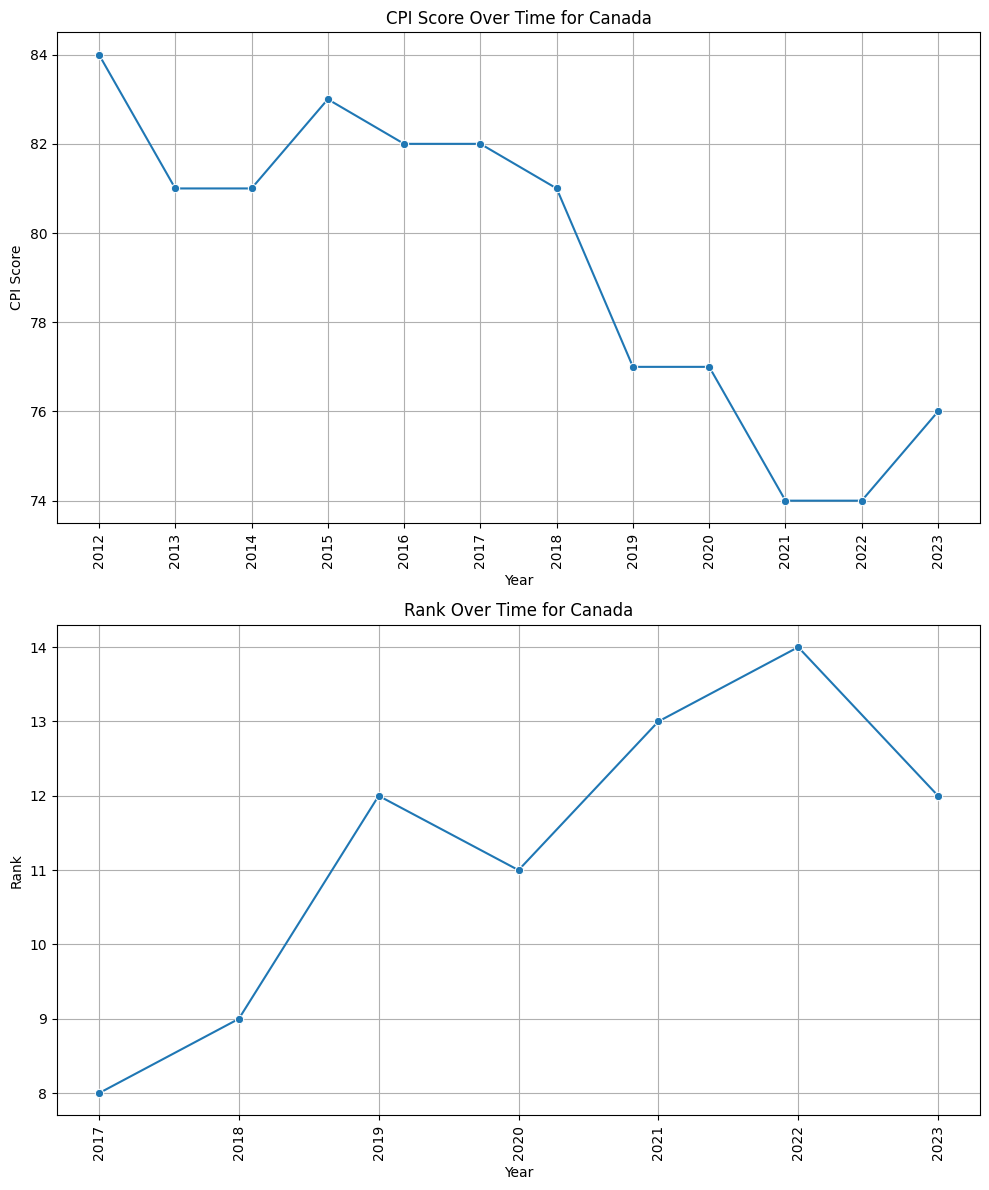

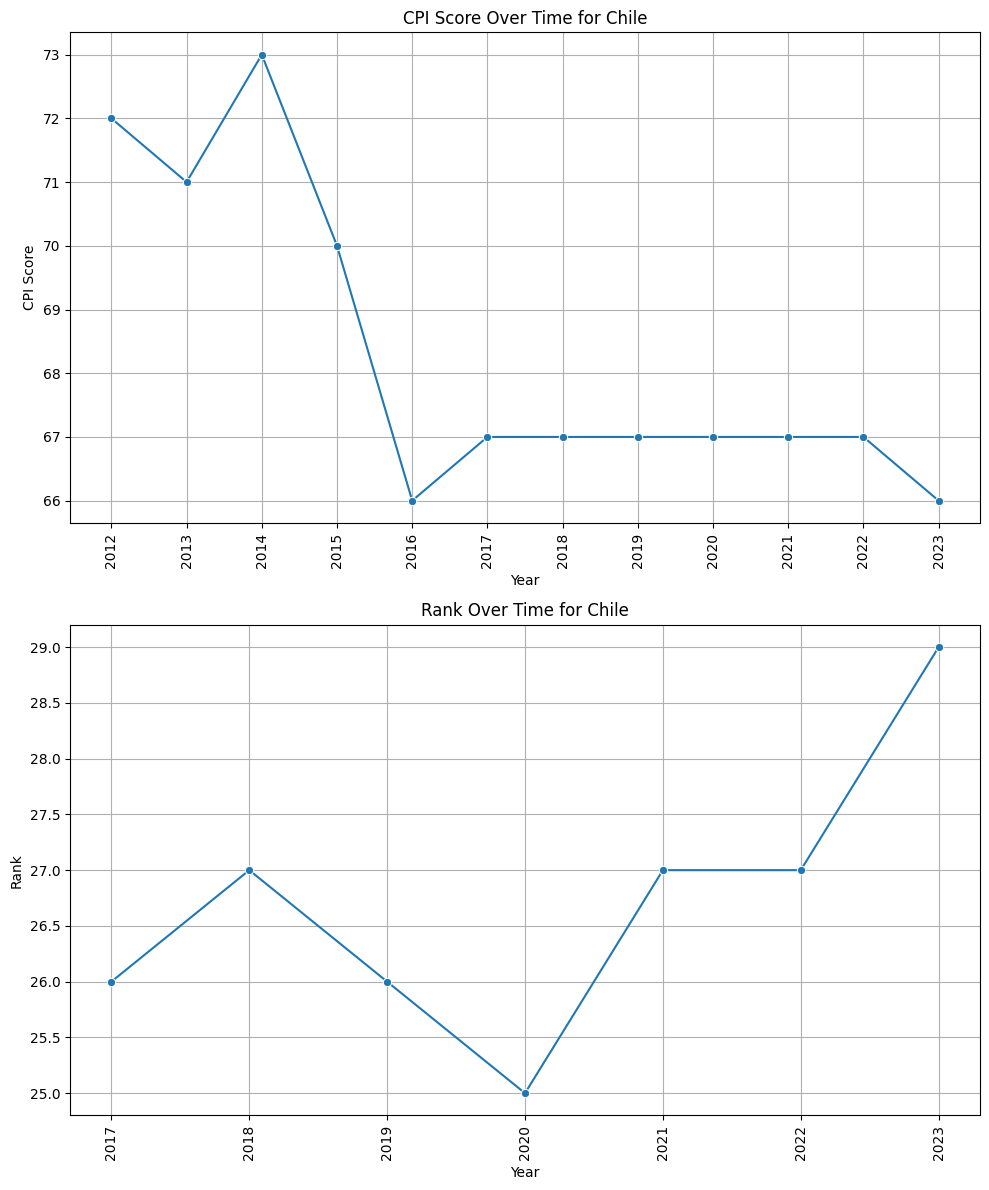

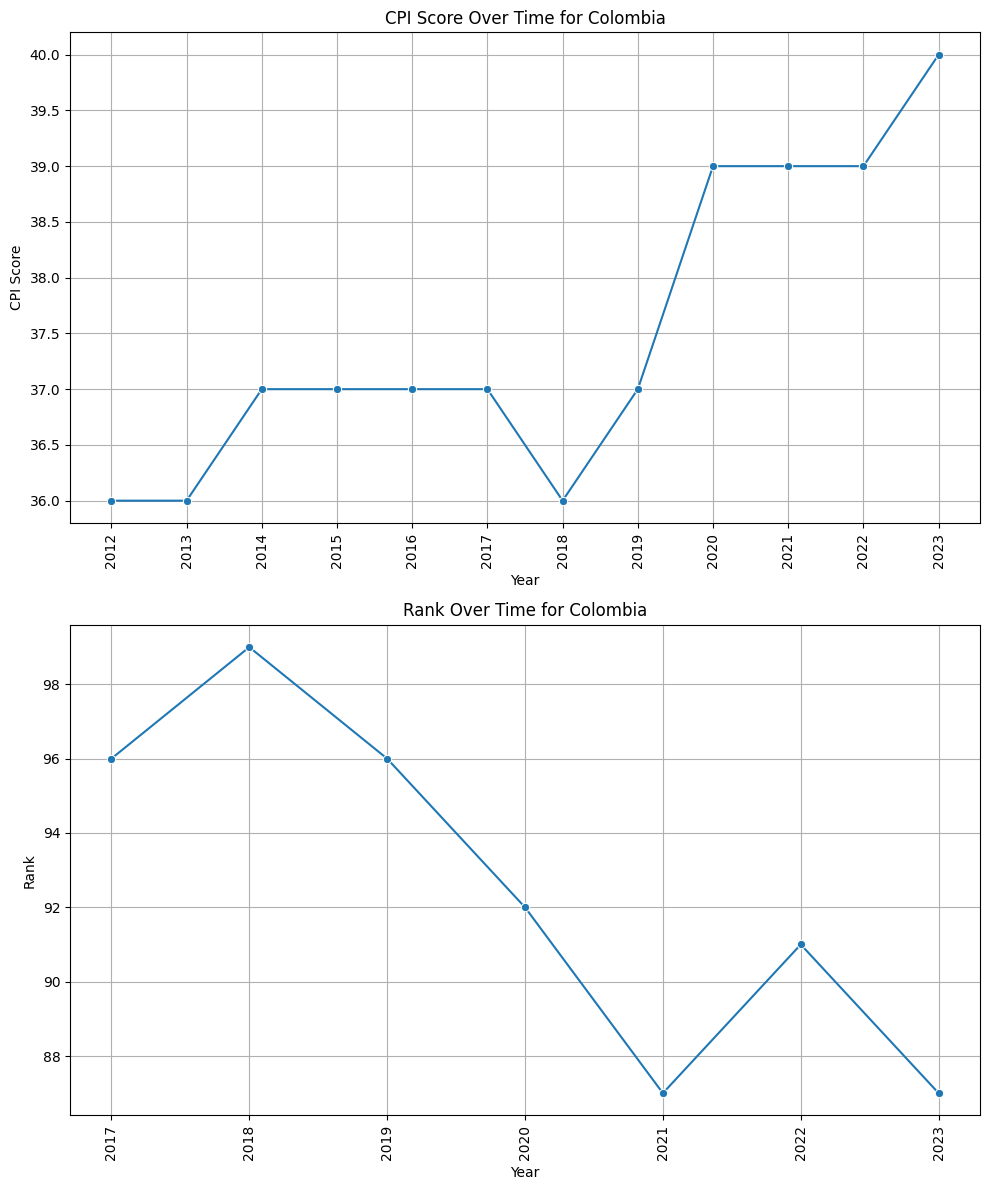

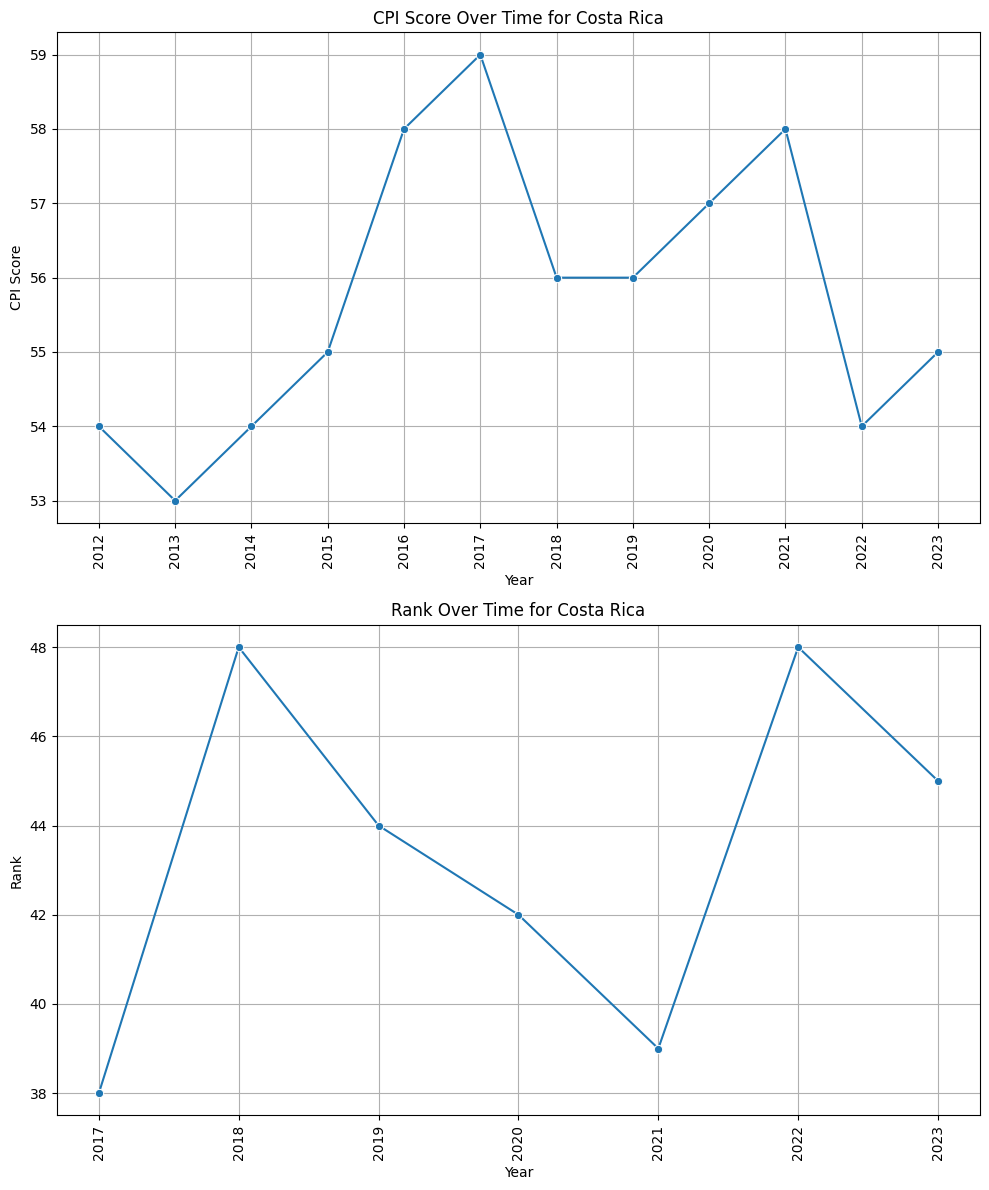

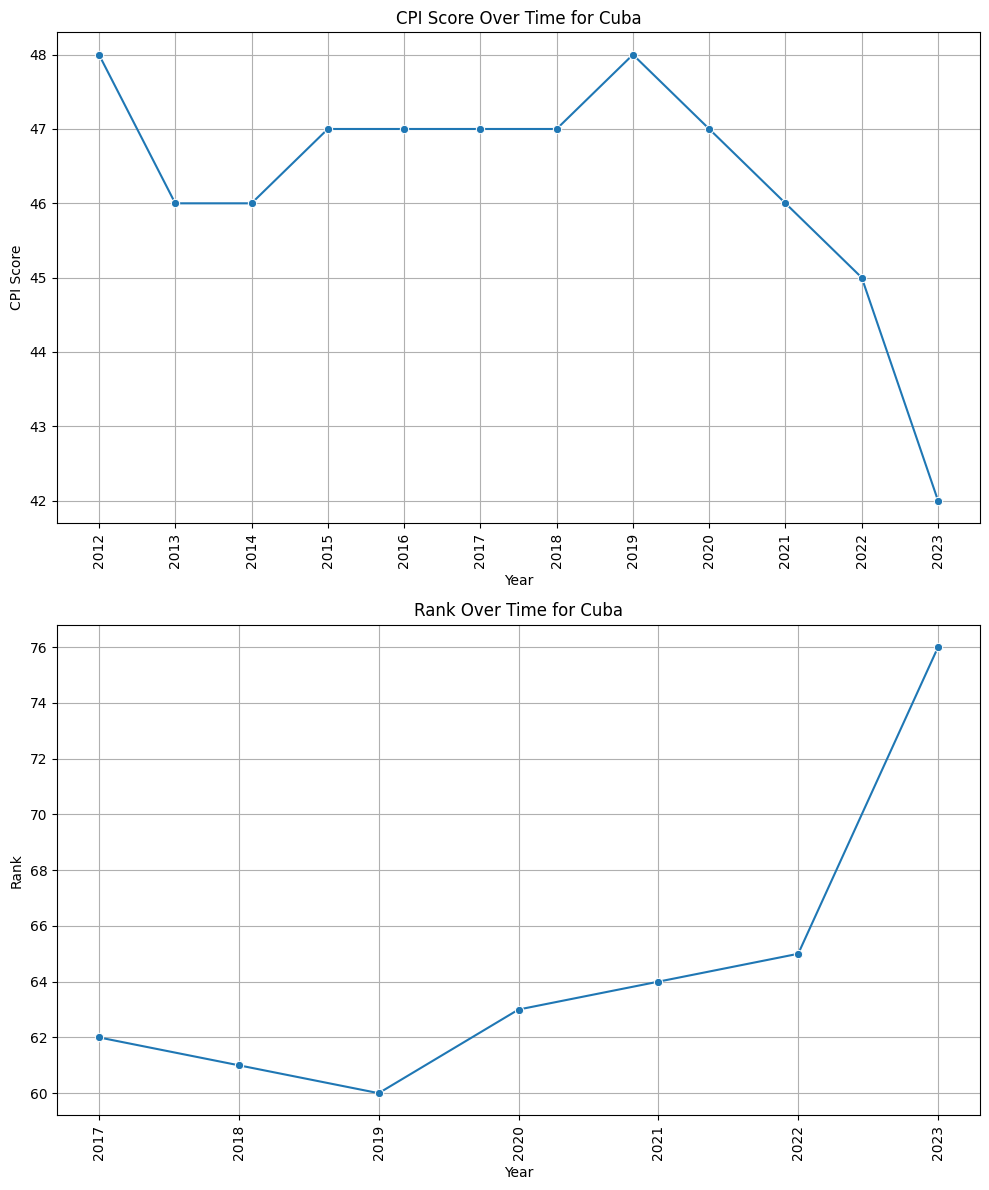

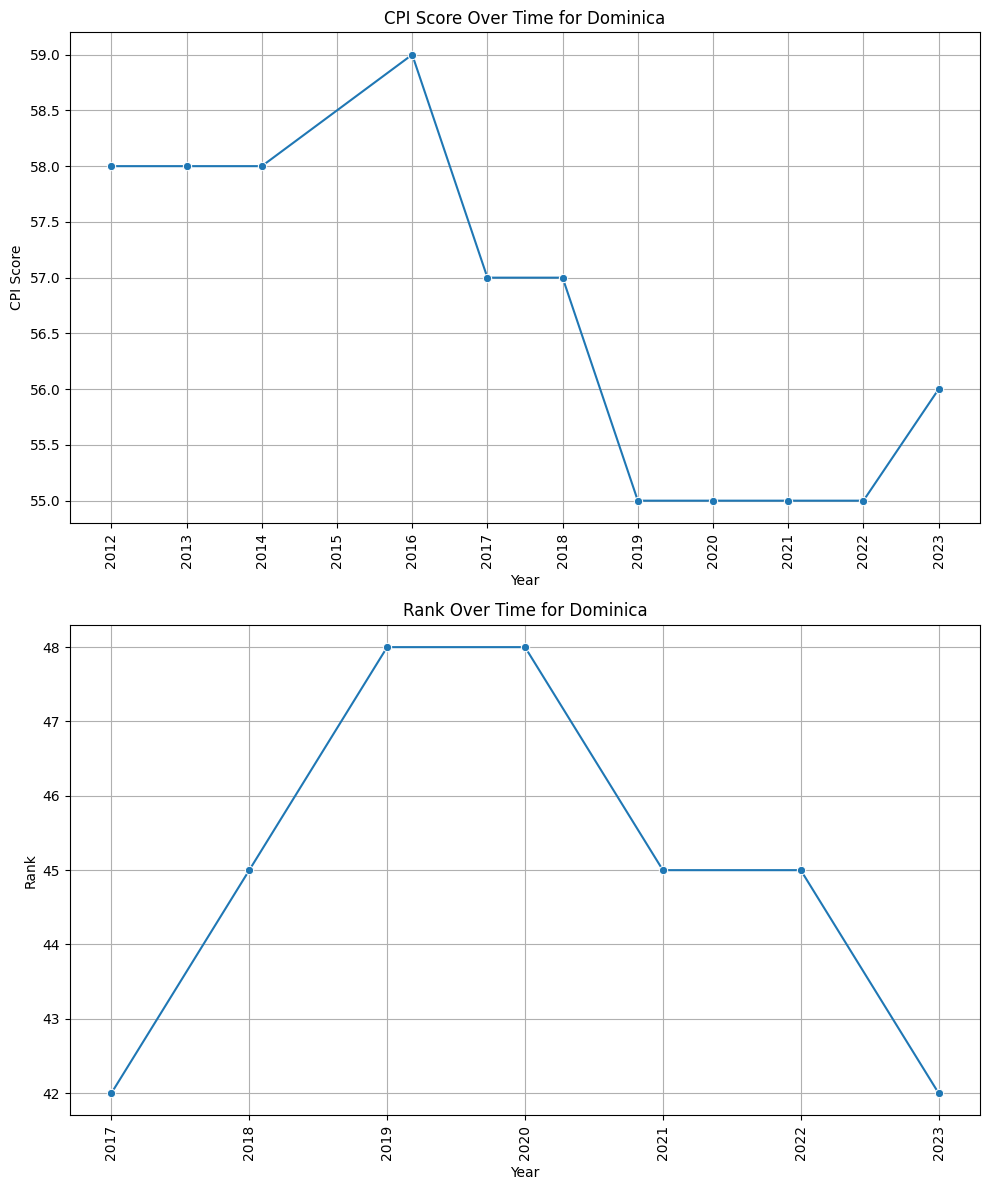

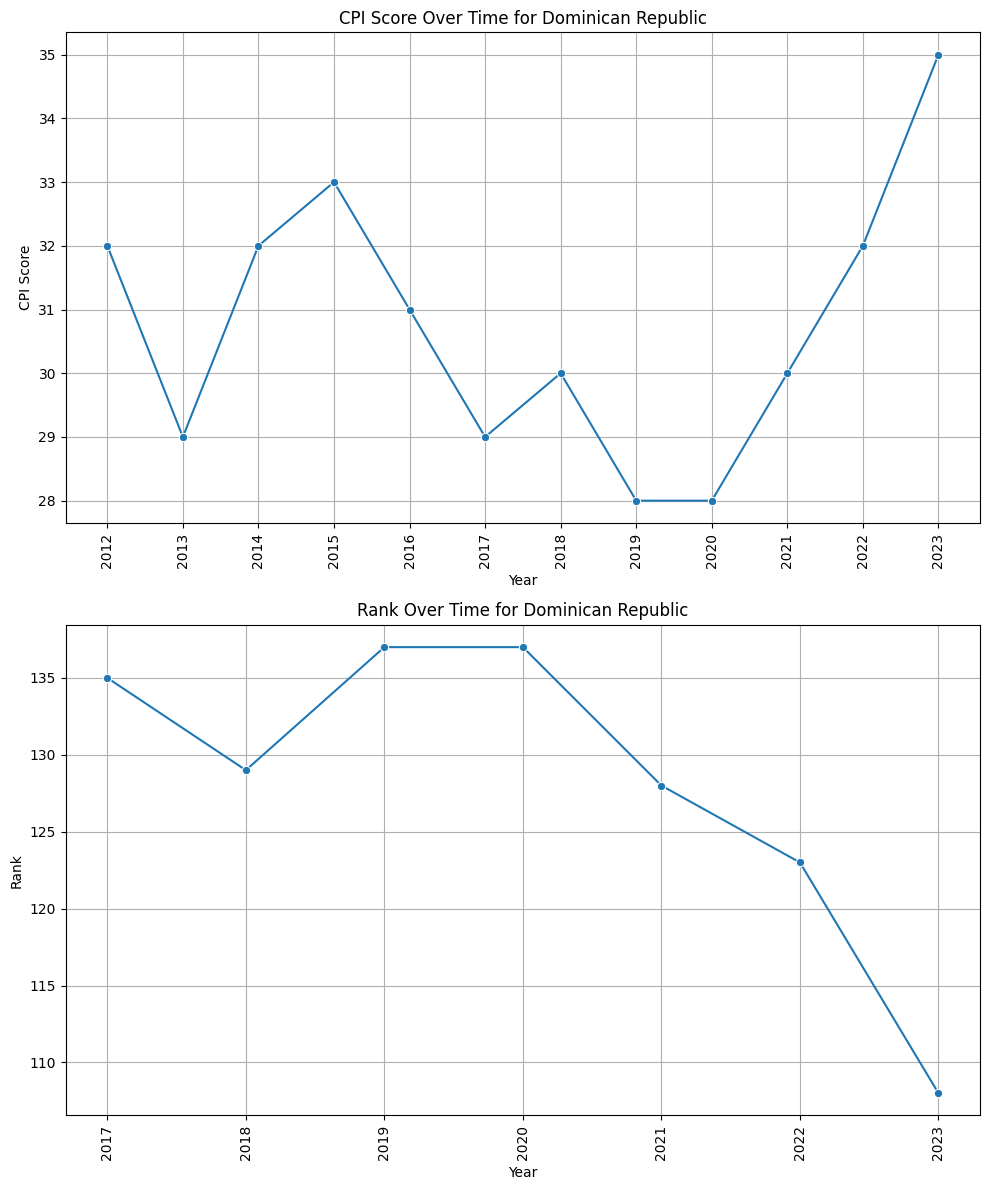

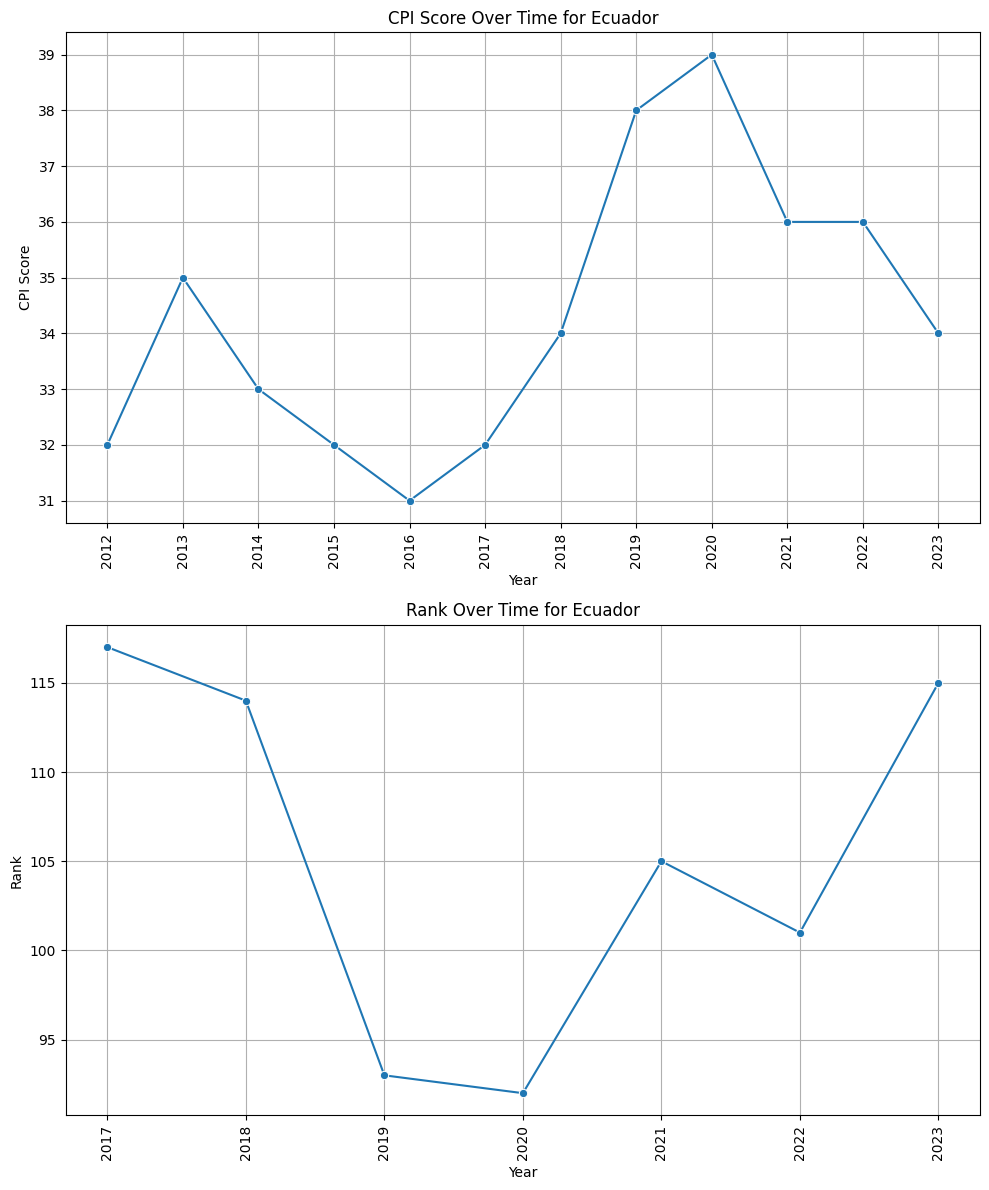

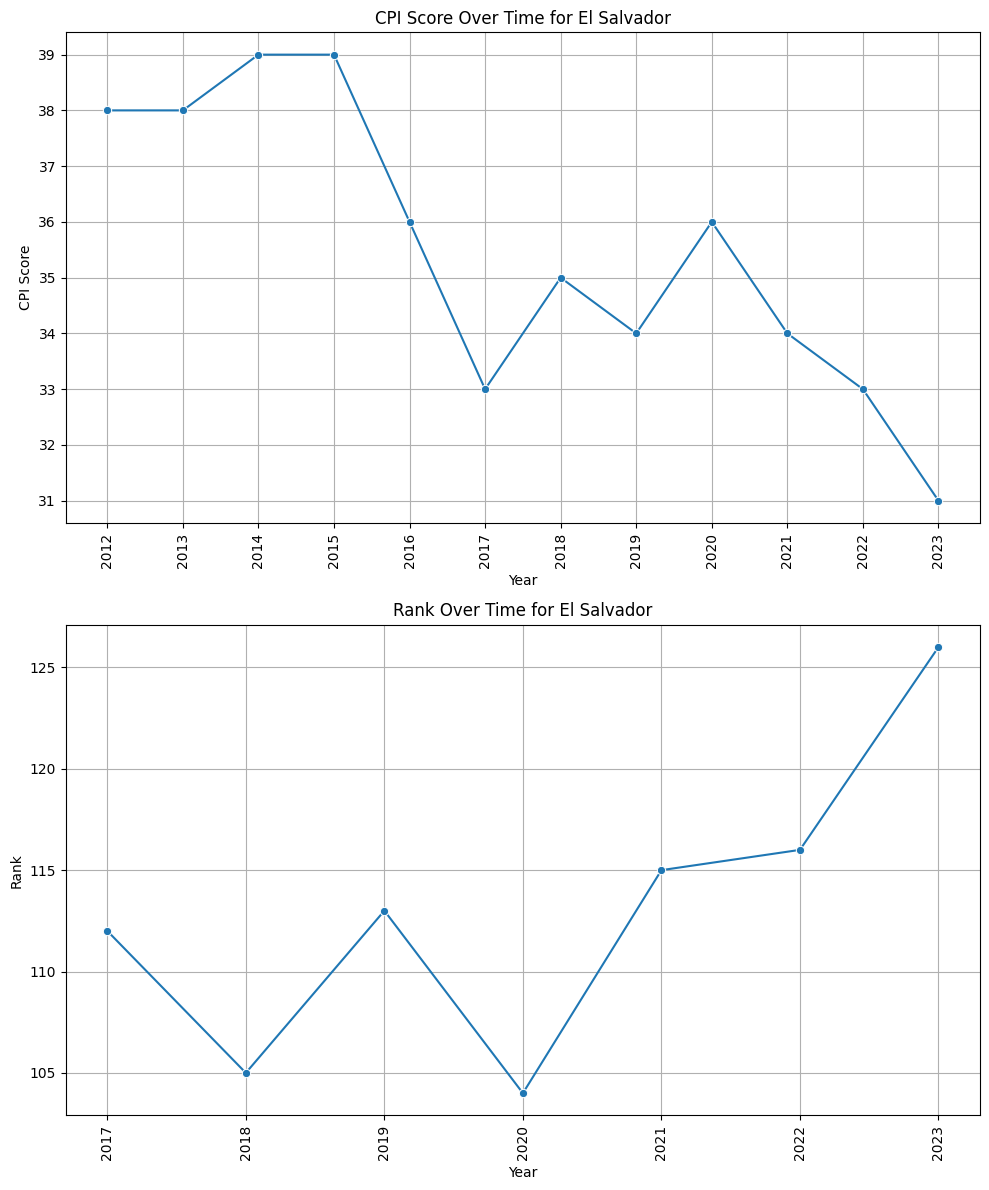

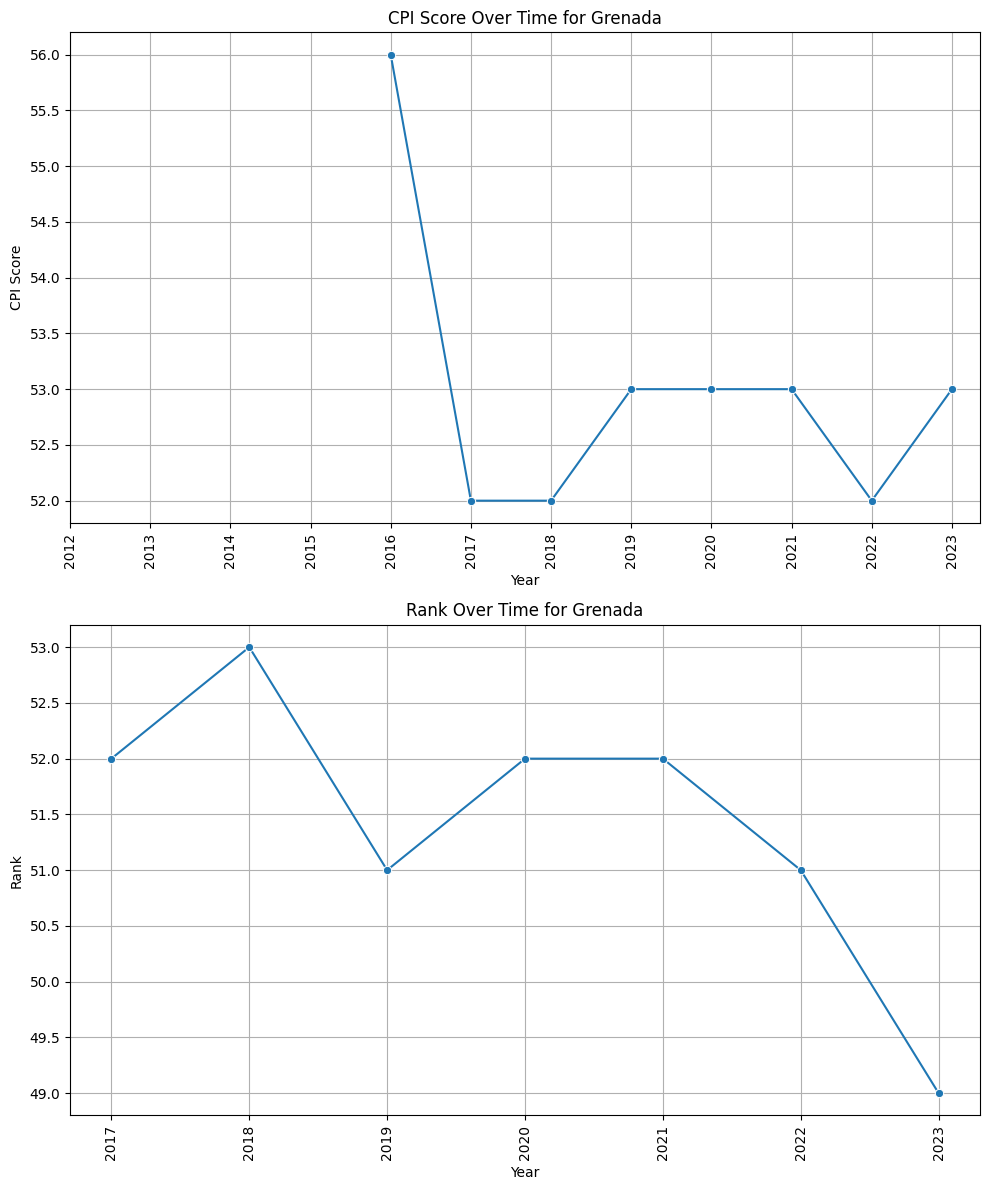

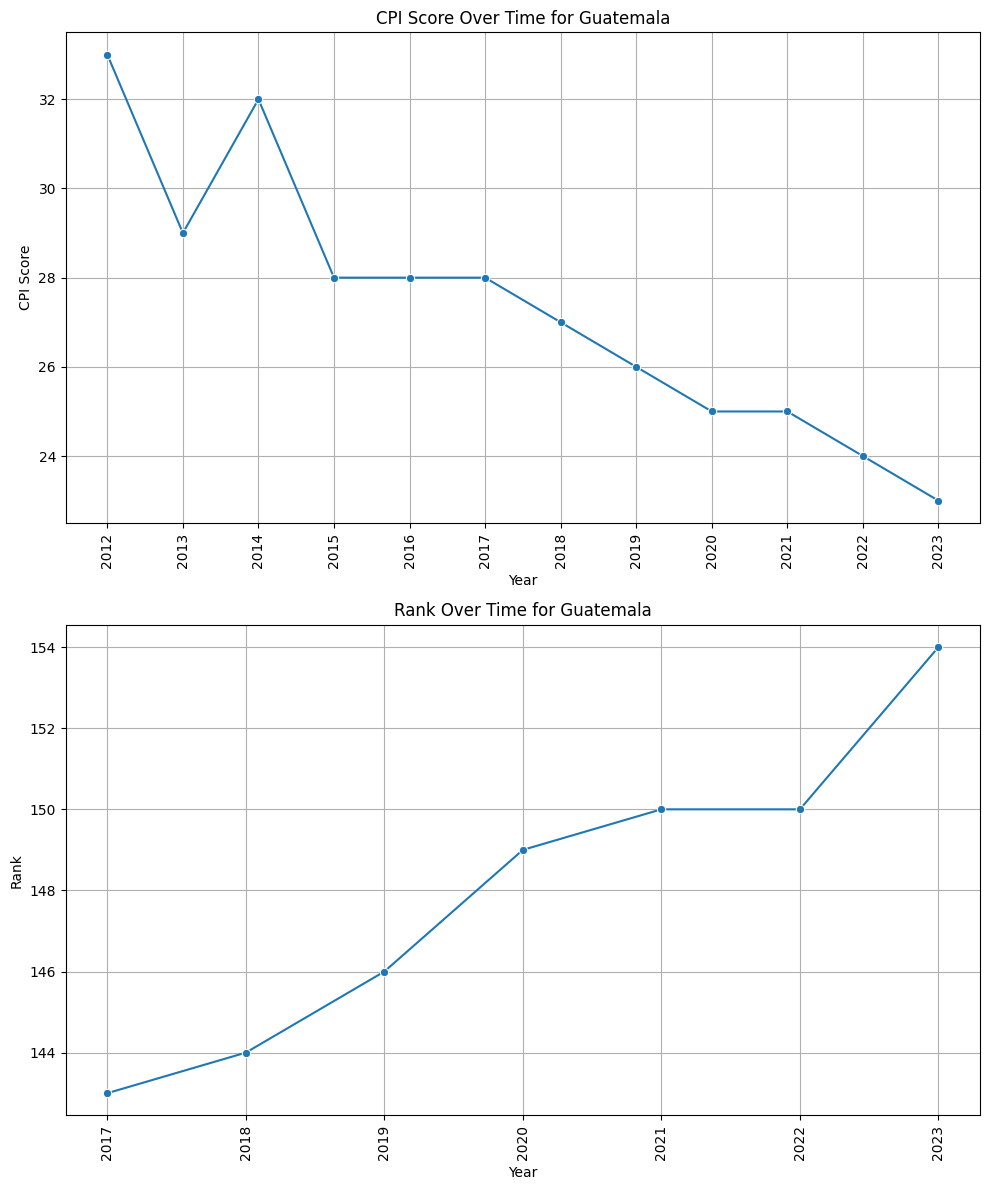

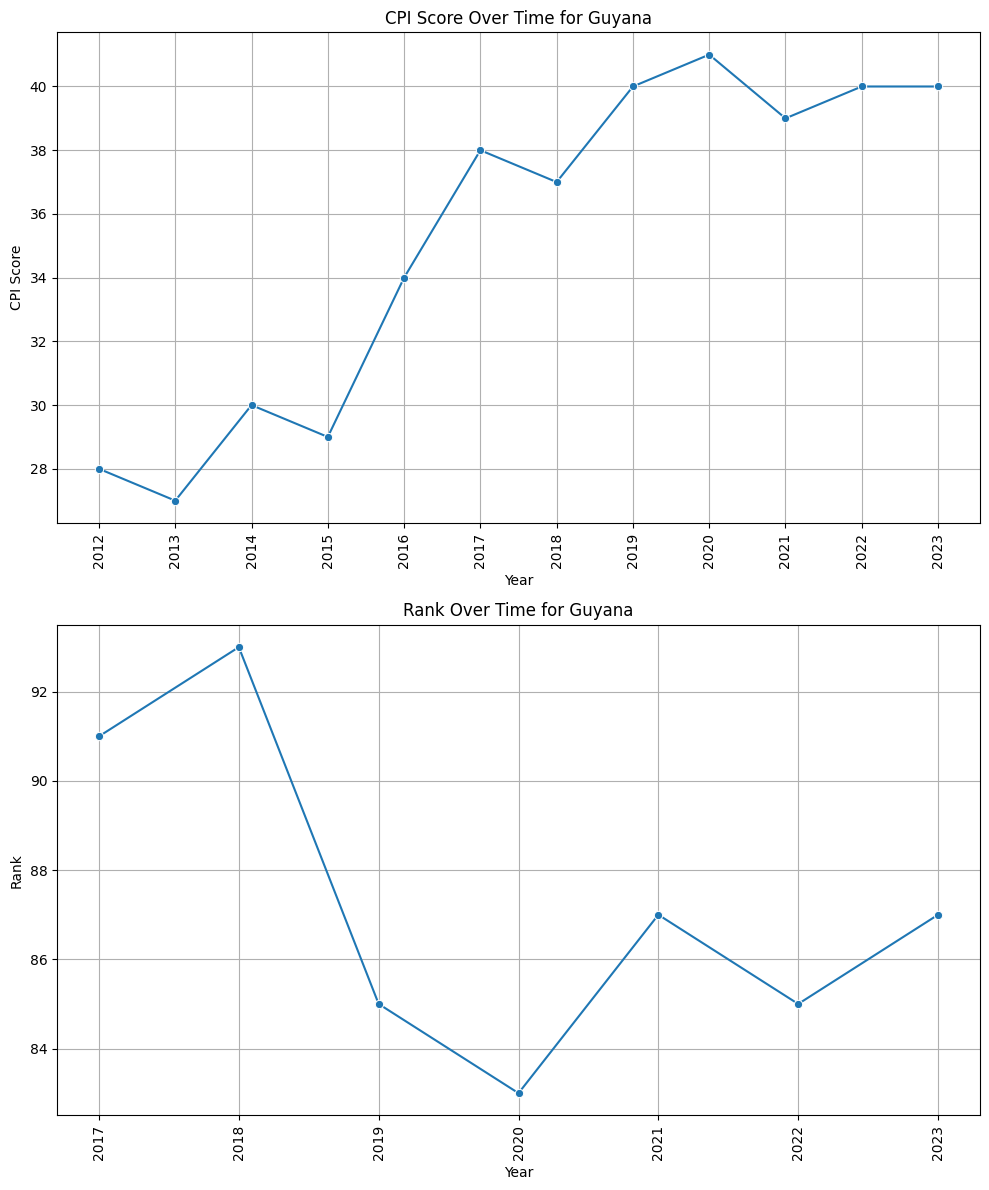

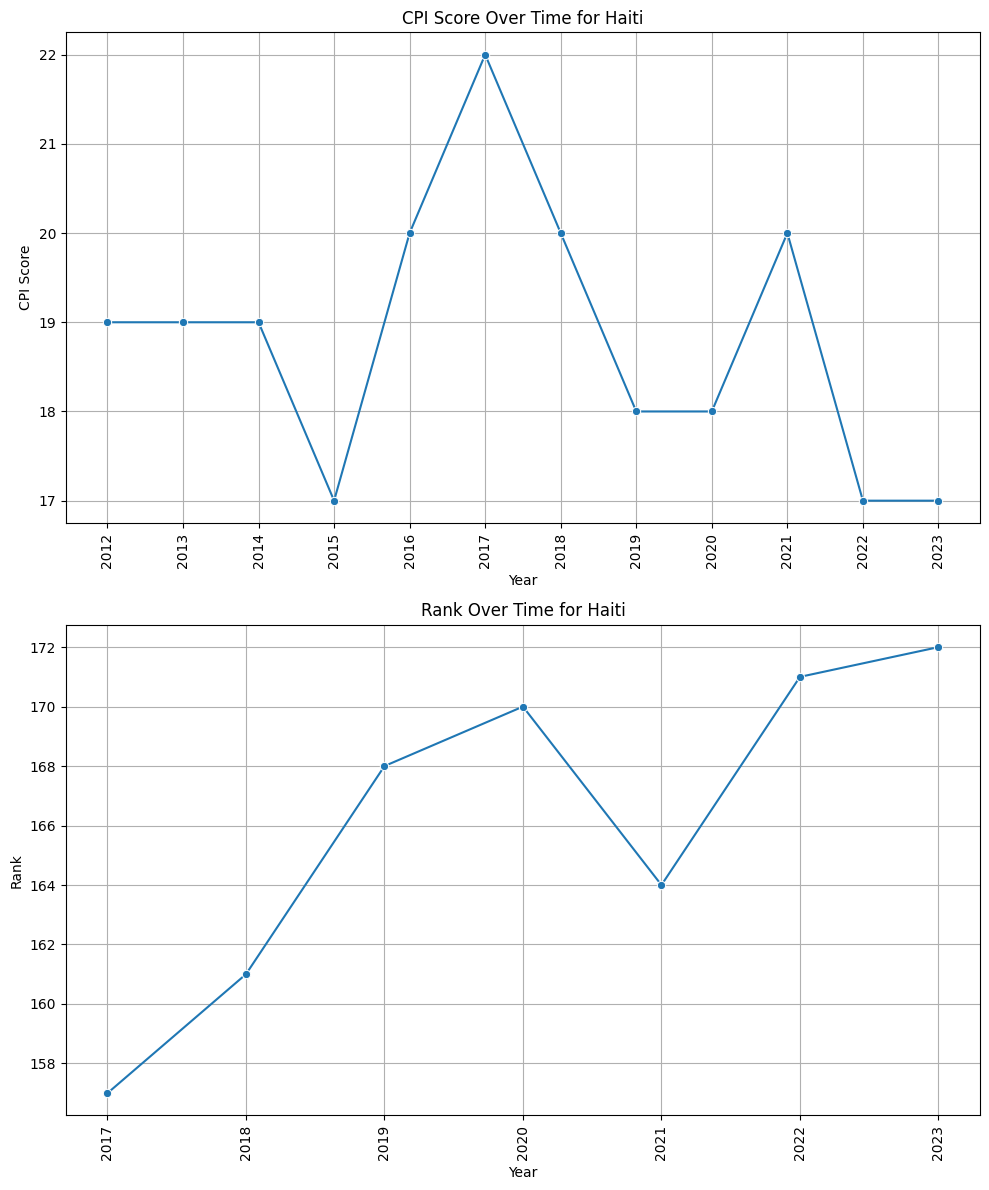

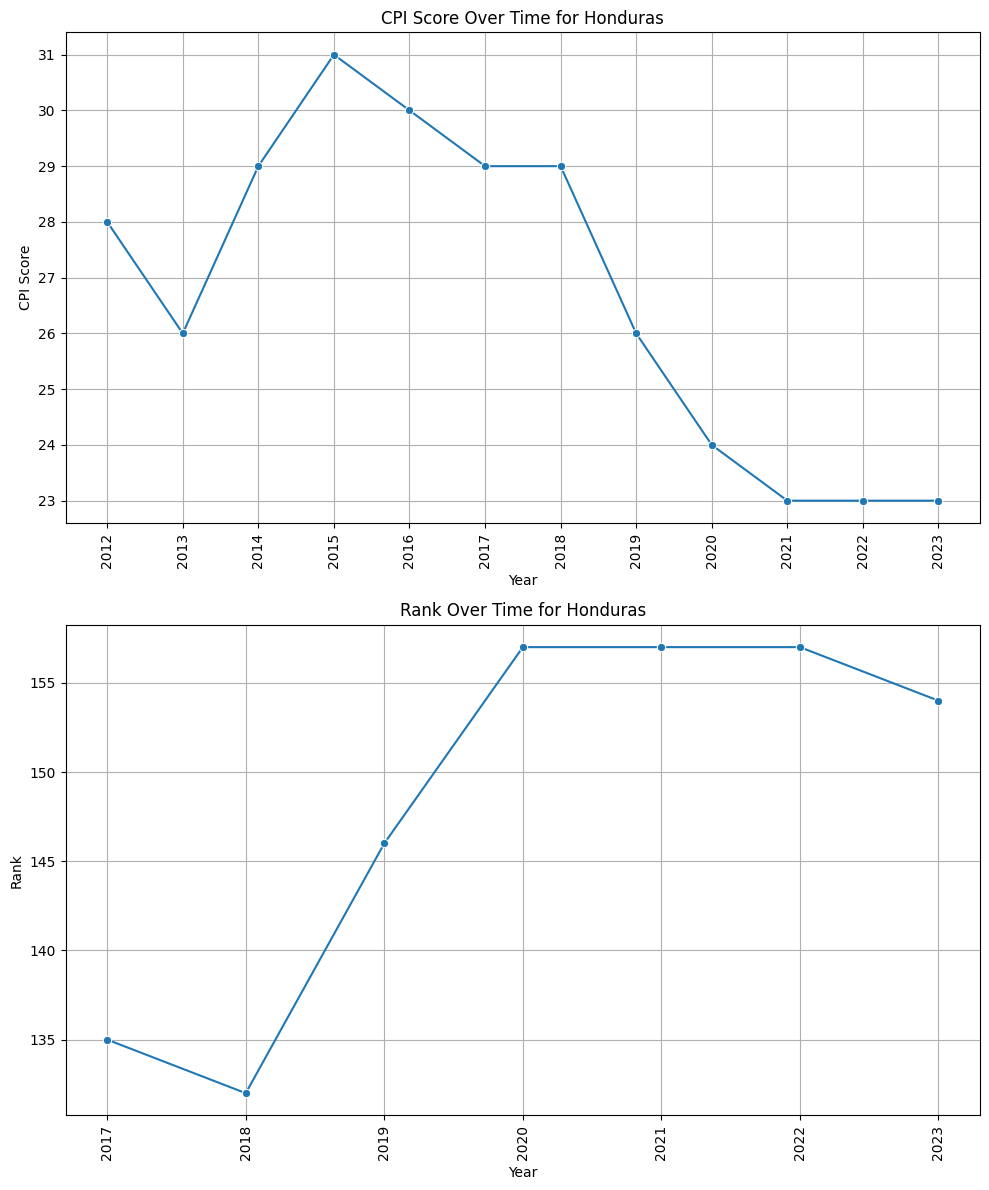

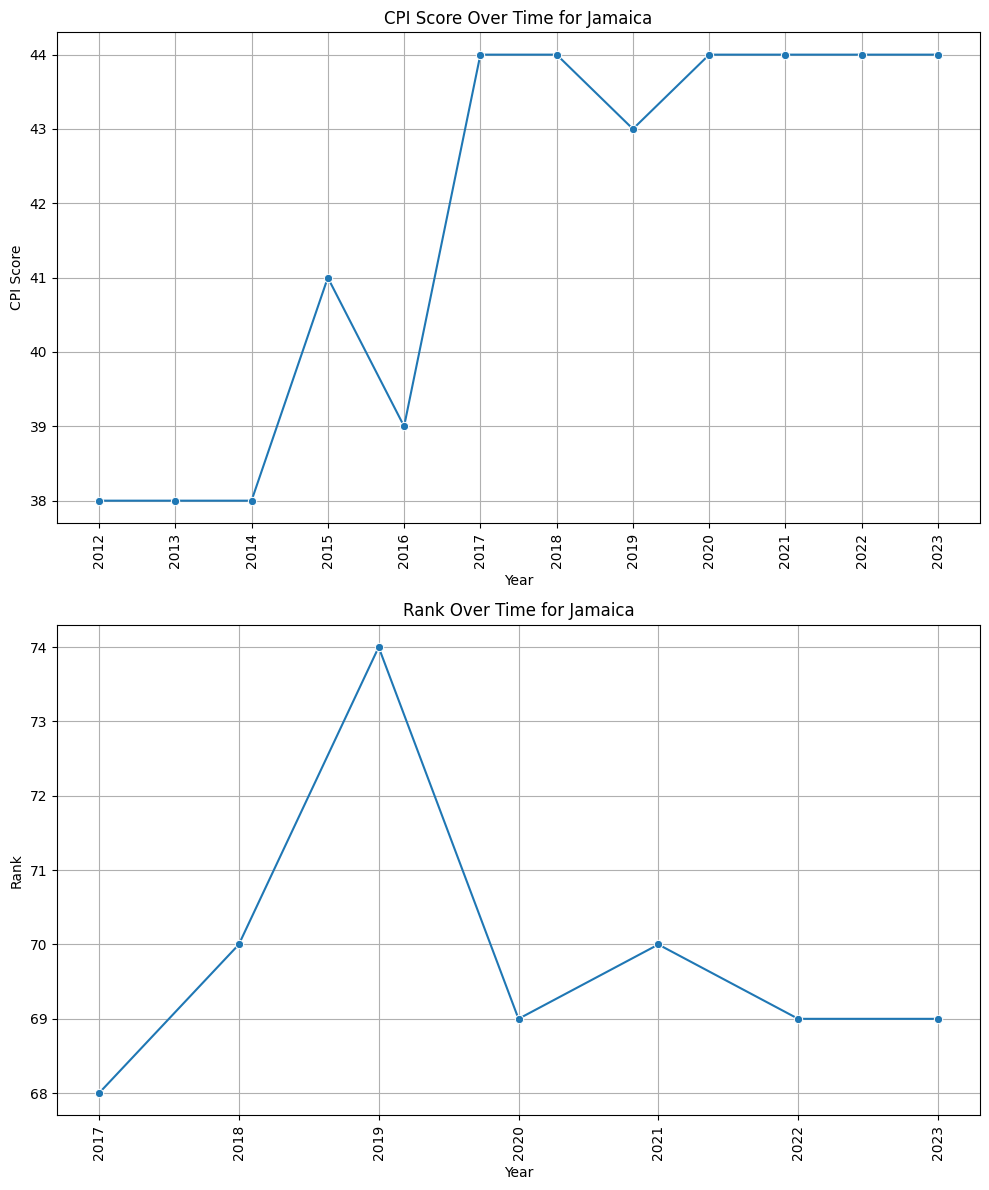

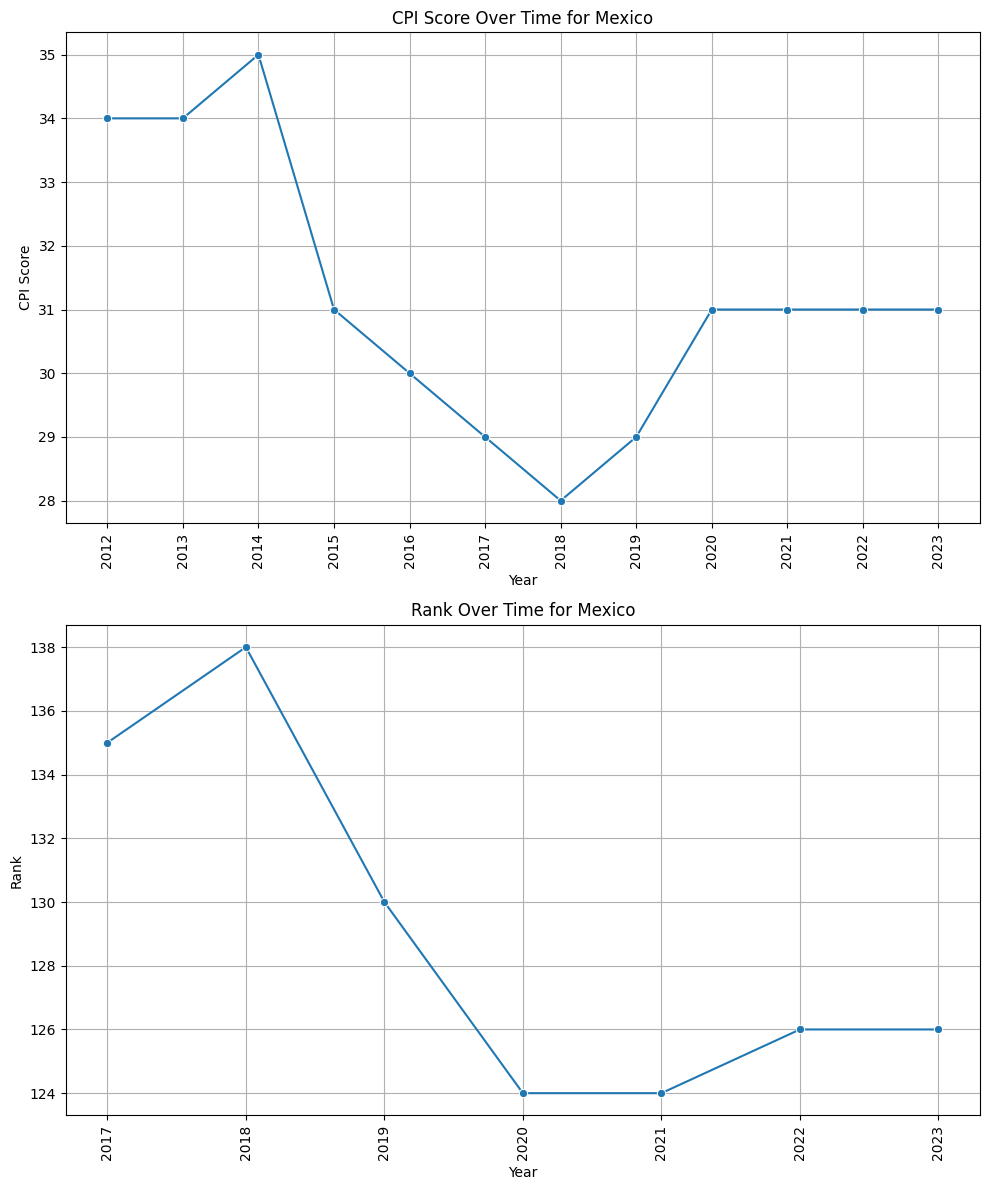

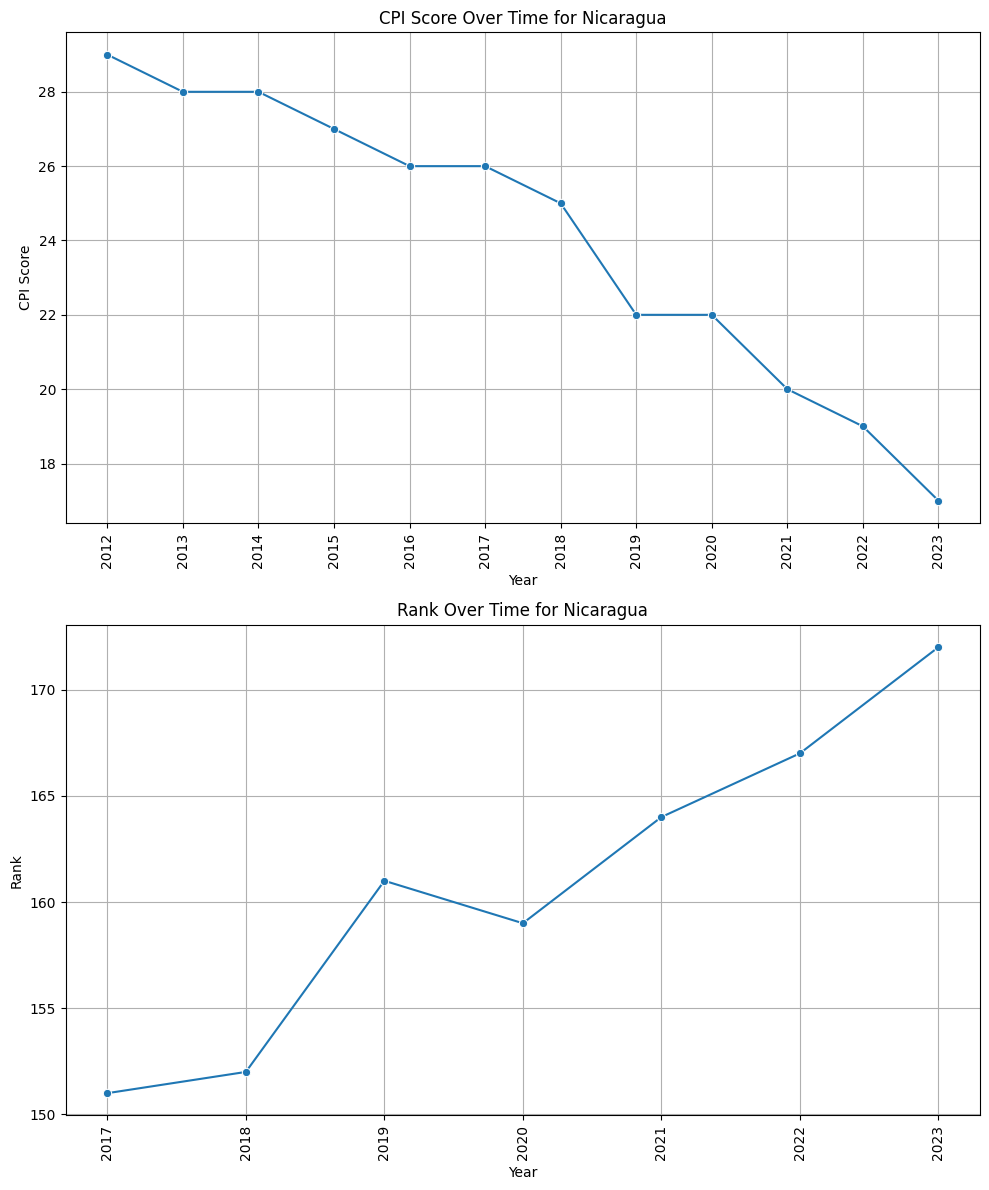

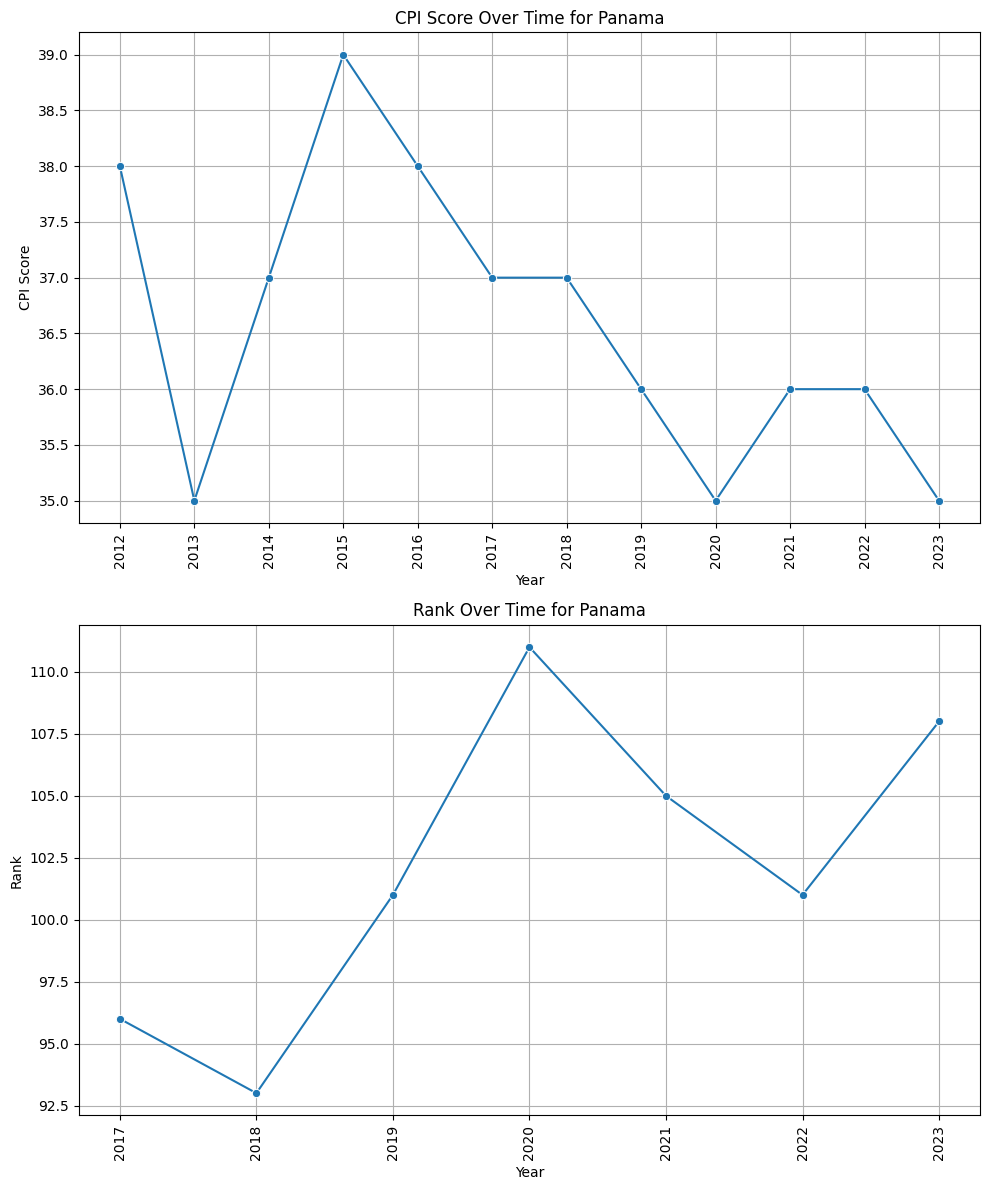

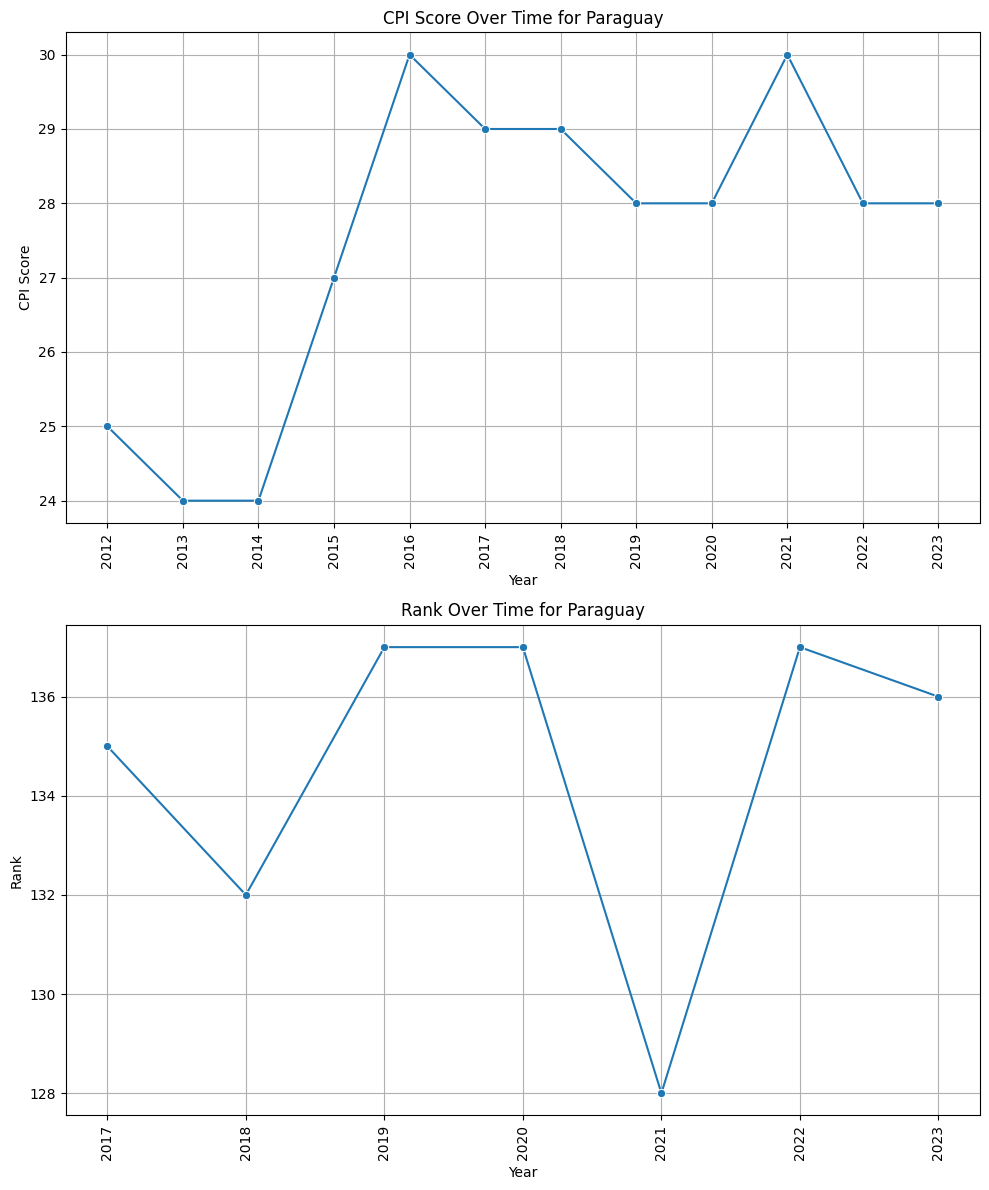

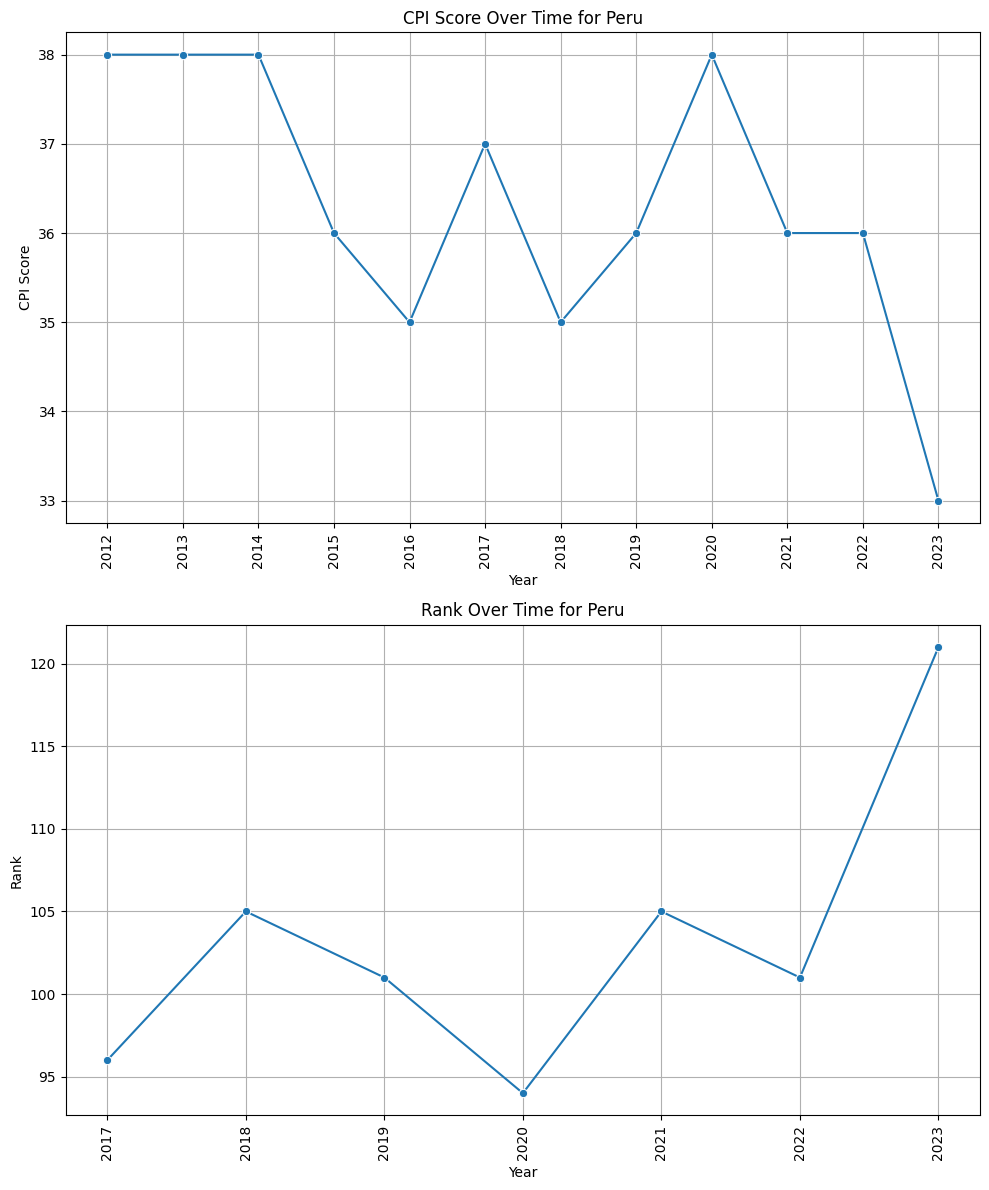

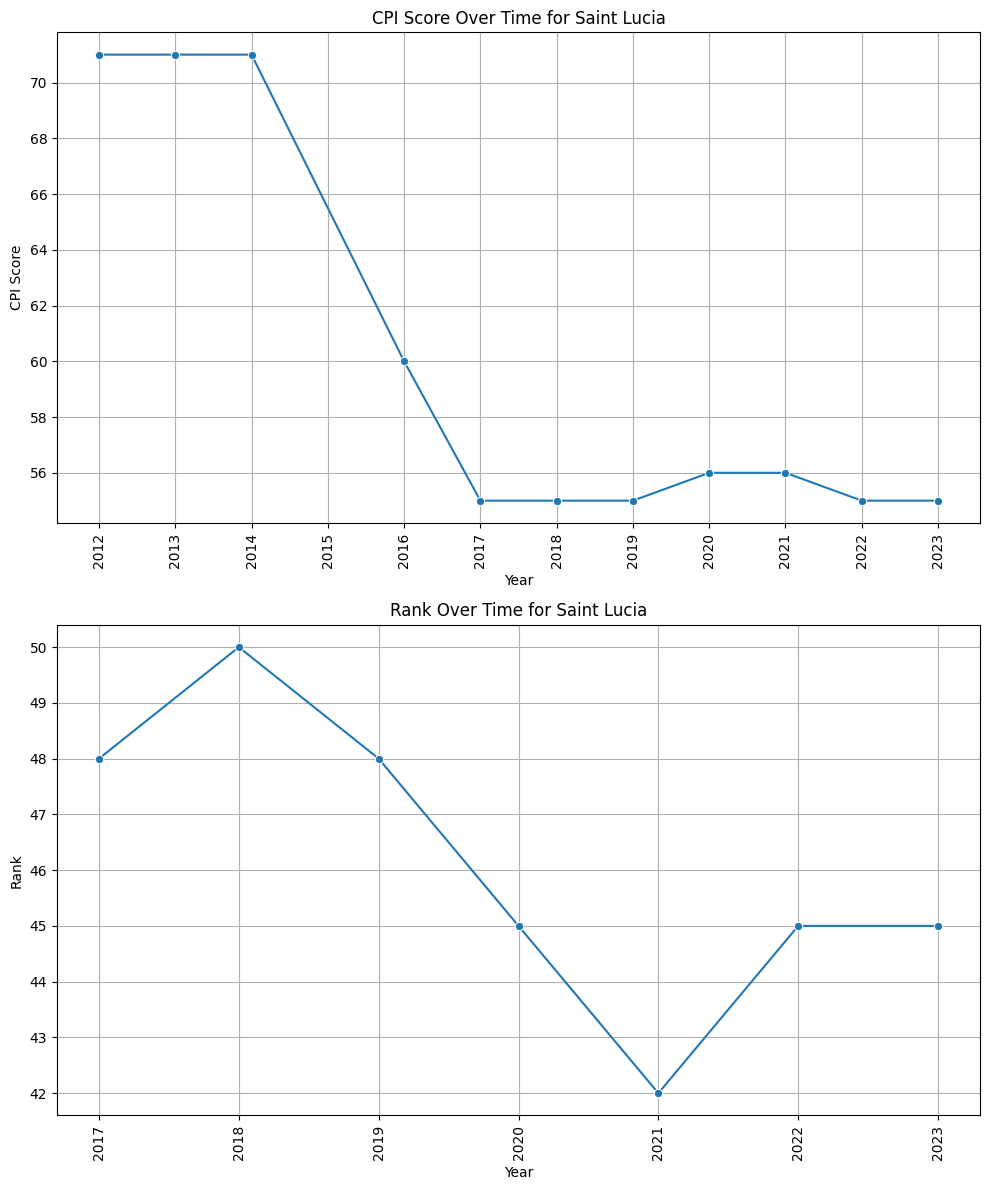

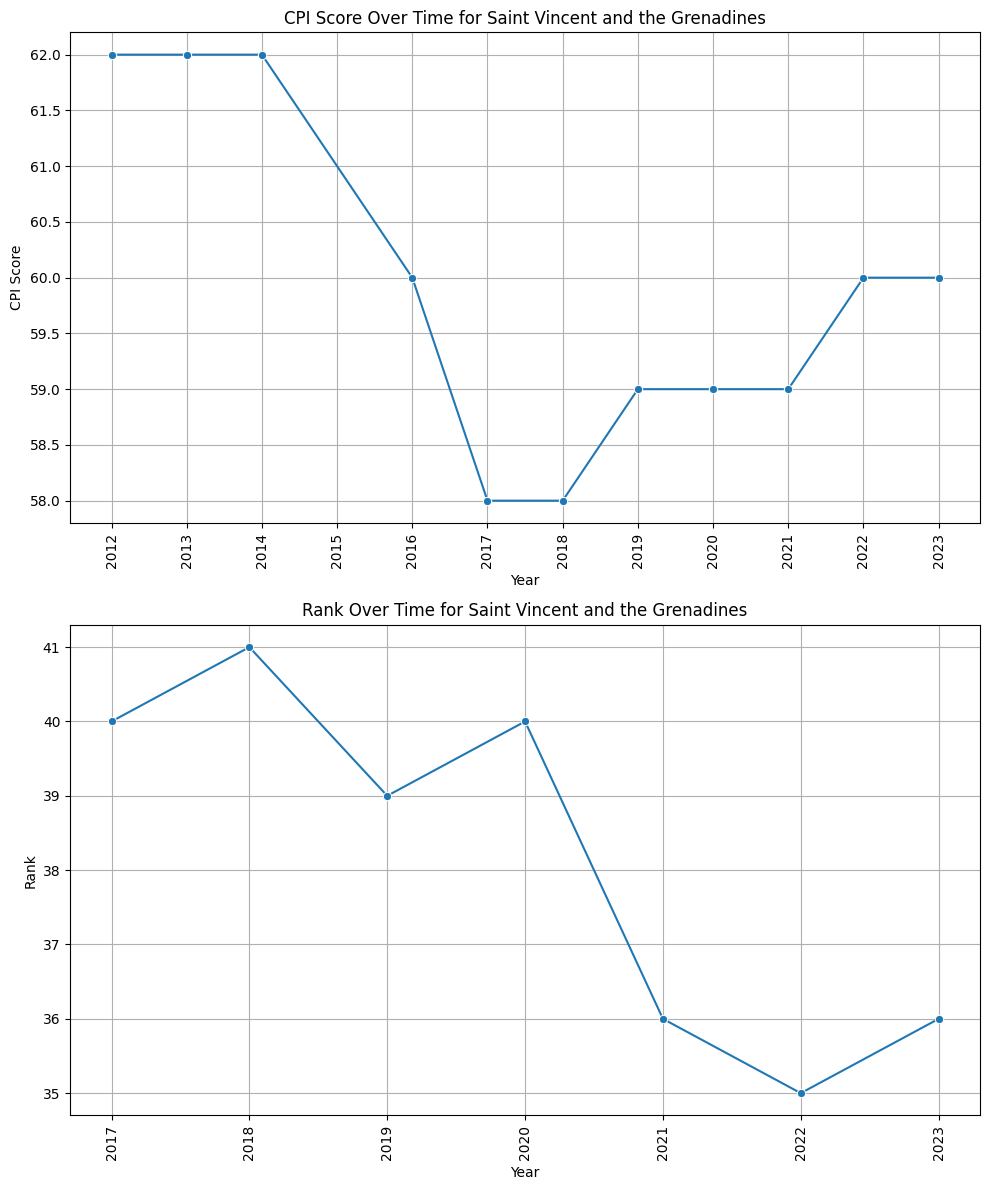

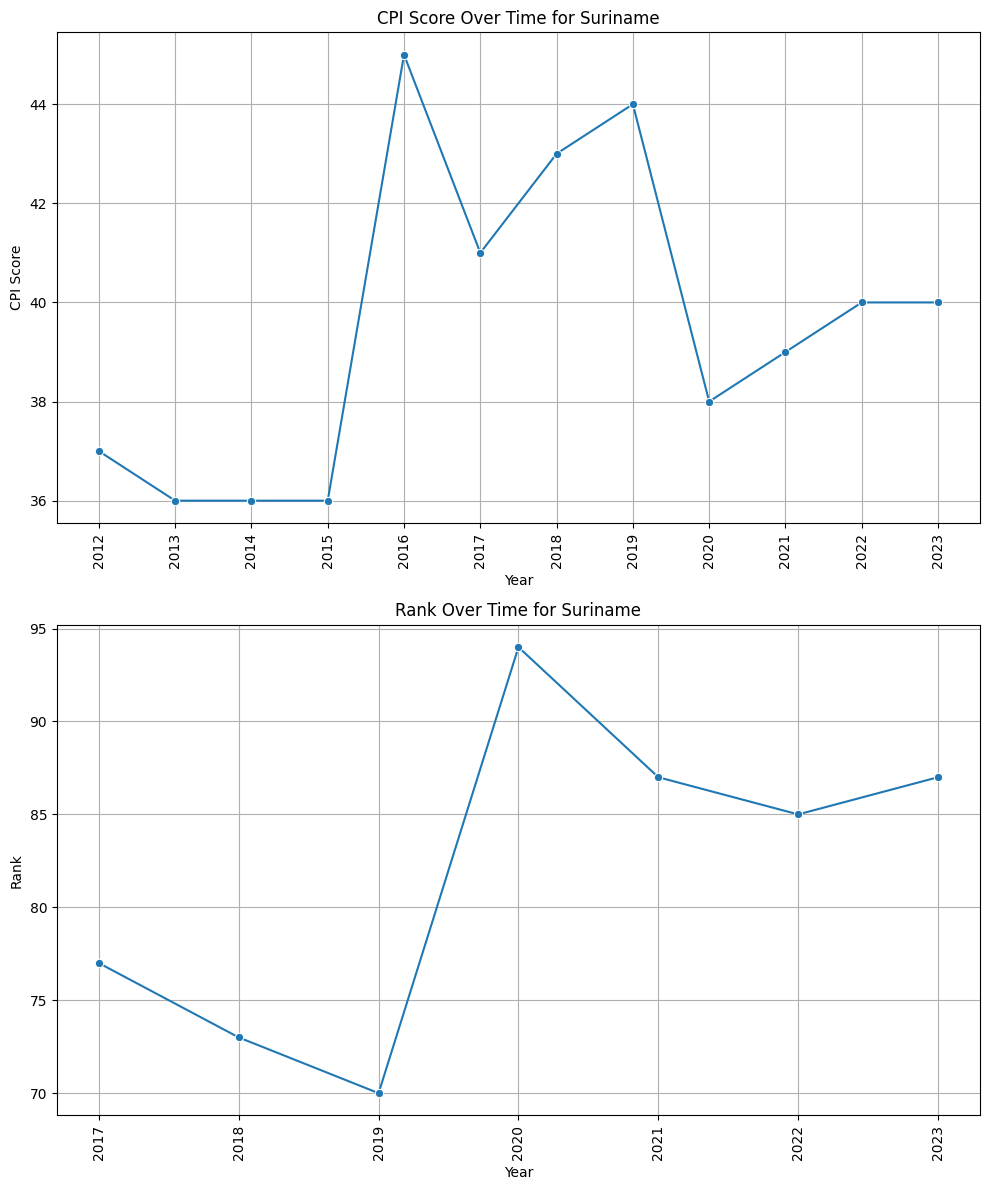

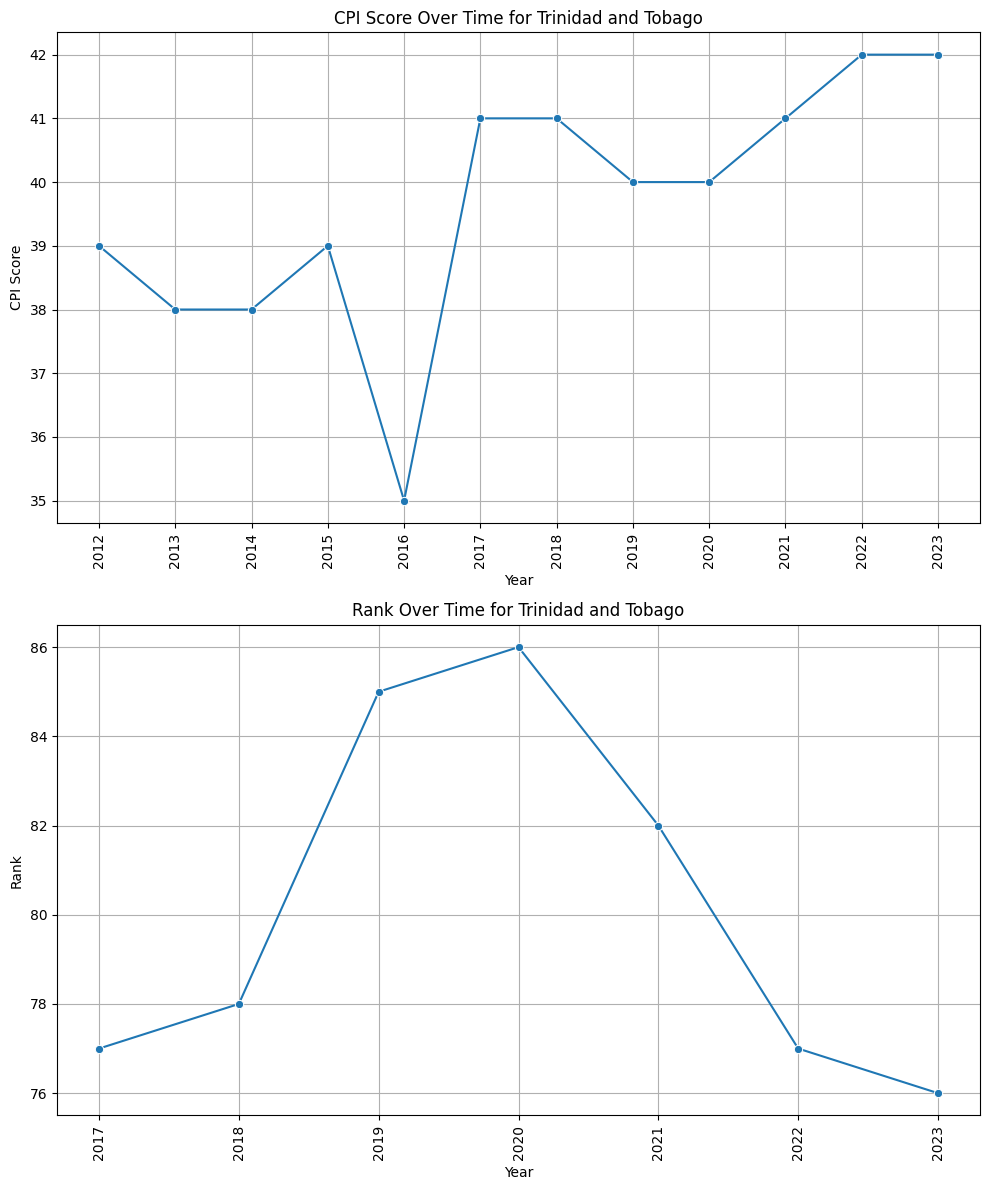

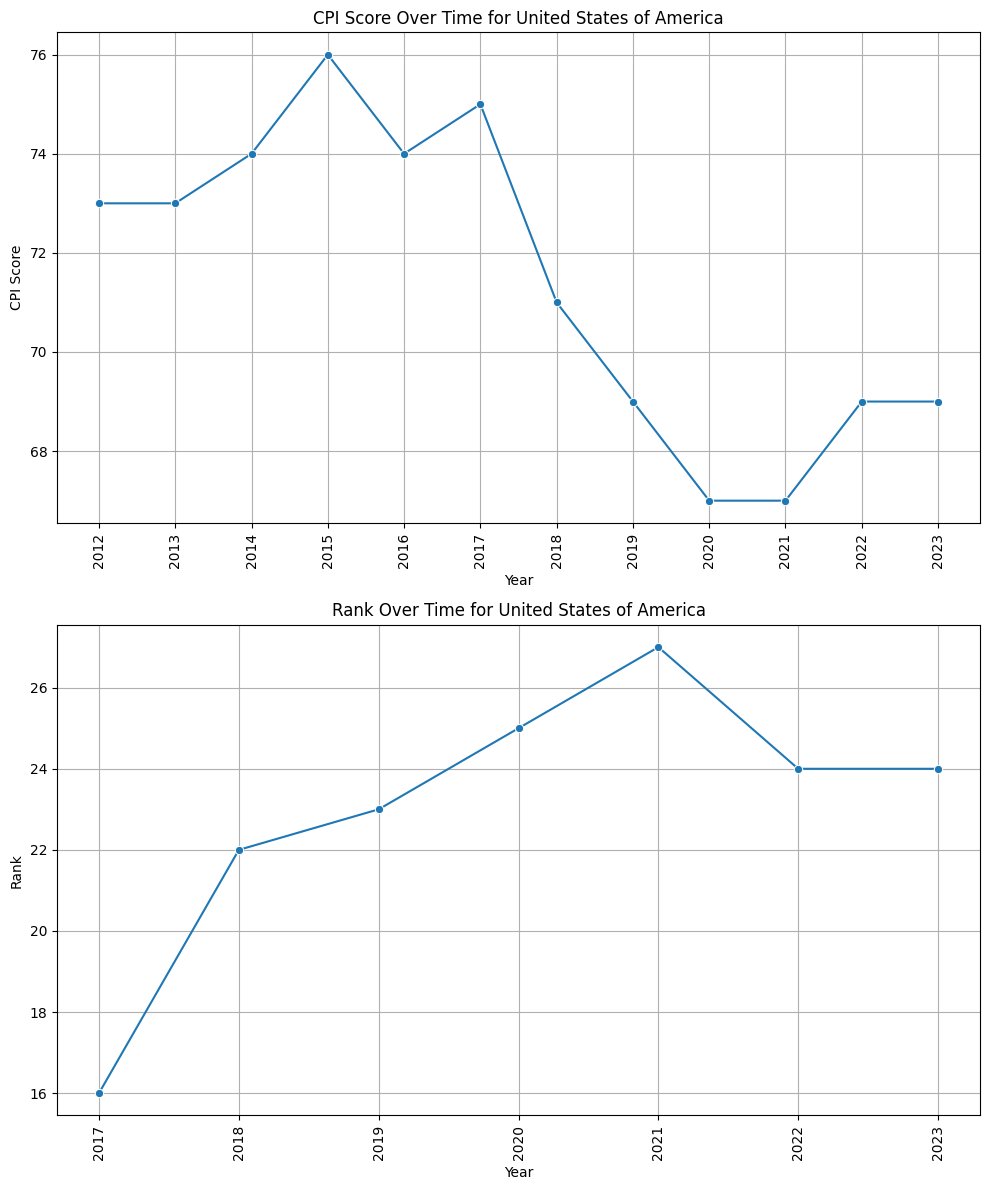

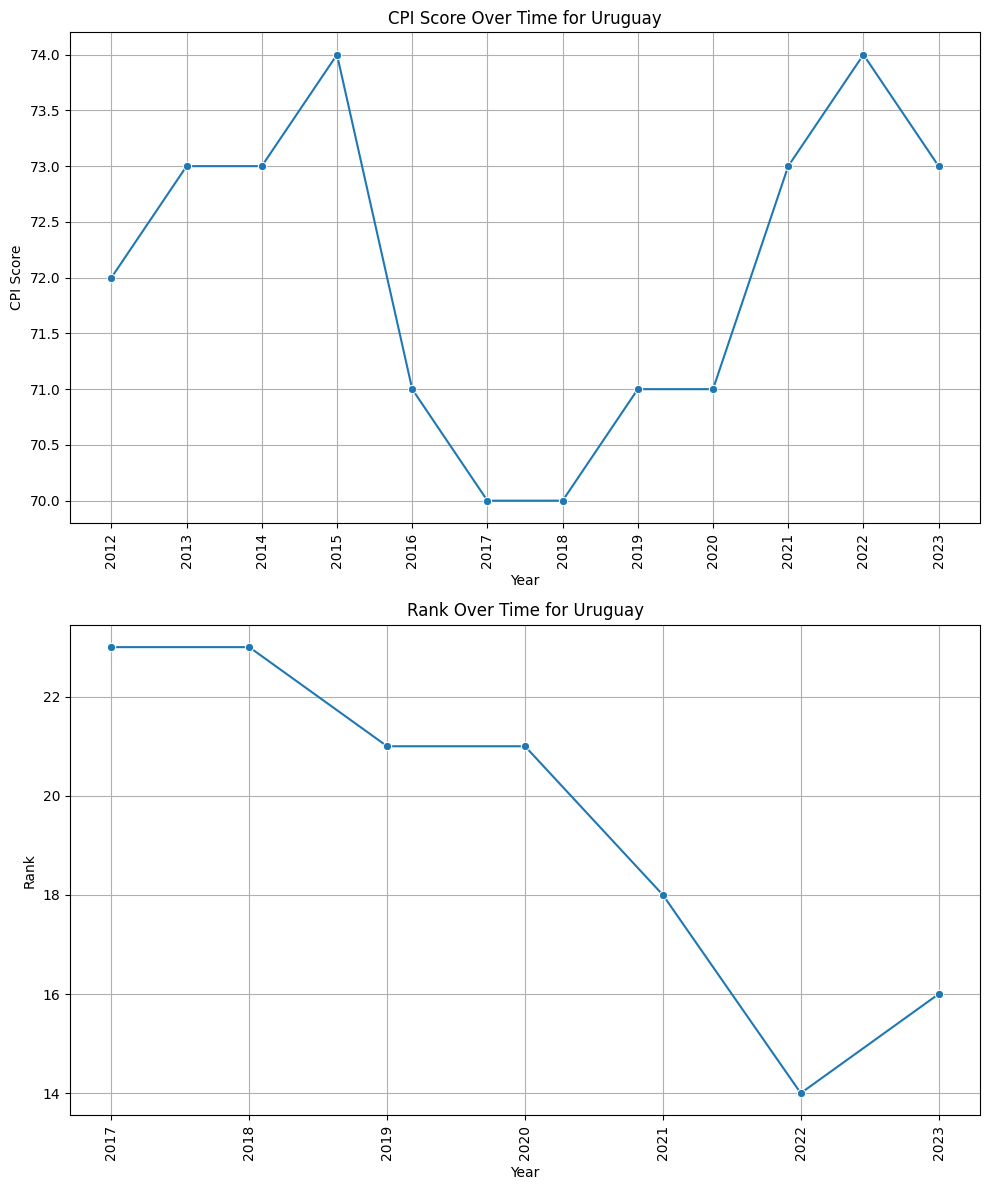

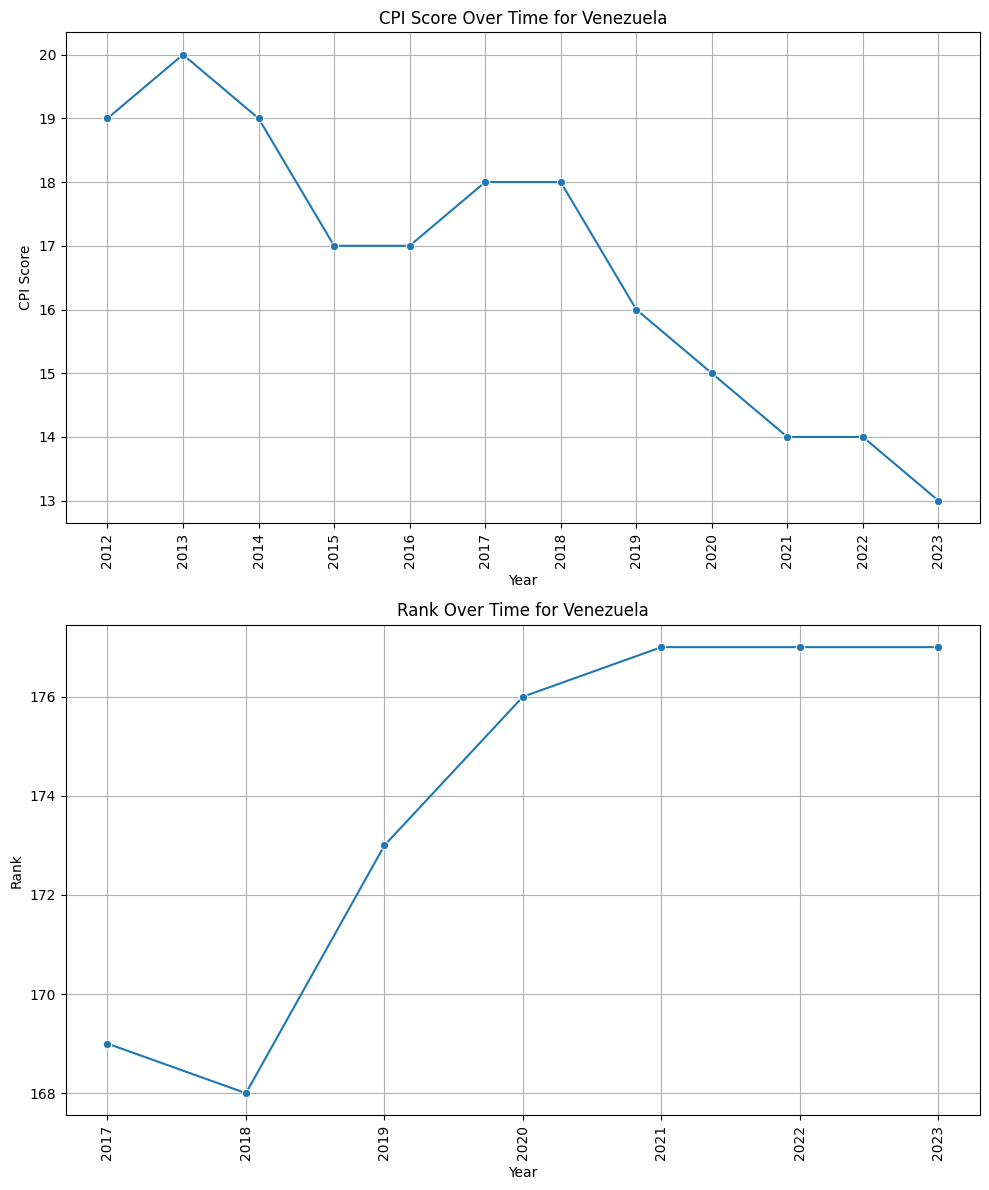

In [26]:
for x in americas_region_timeseries['country__territory'].unique():
    
    temp_scores = timeseries_long[timeseries_long['country__territory'] == x]
    temp_rank = timeseries_rank[timeseries_rank['country__territory'] == x]
    
    plt.figure(figsize = (10, 12))
    
    plt.subplot(2,1,1)
    sns.lineplot(data = temp_scores, x = 'year', y = 'cpi_score', marker = 'o')
    plt.title(f'CPI Score Over Time for {x}')
    plt.xlabel('Year')
    plt.ylabel('CPI Score')
    plt.grid(True)
    plt.xticks(temp_scores['year'].unique(), rotation = 90)
    
    plt.subplot(2,1,2)
    sns.lineplot(data = temp_rank, x = 'year', y = 'rank', marker = 'o')
    plt.title(f'Rank Over Time for {x}')
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.grid(True)
    plt.xticks(temp_rank['year'].unique(), rotation = 90)
    plt.tight_layout()
    plt.show()

<h1>Global Insights Country Risk Ratings</h1>

<p>The global insights country risk ratings refer to assessments of the risk level associated with investing or doing business with a particular country.</p>

<p>These ratings typically analyze various factors such as political stability, economic conditions, security issues, financial system integrity and other relevant metrics</p>

<p>If you wish to see more of these metrics please view the International Country Risk Guide Methodology <a href = 'https://www.prsgroup.com/wp-content/uploads/2012/11/icrgmethodology.pdf'>Country Risk Guide Methodolody</a> </p>

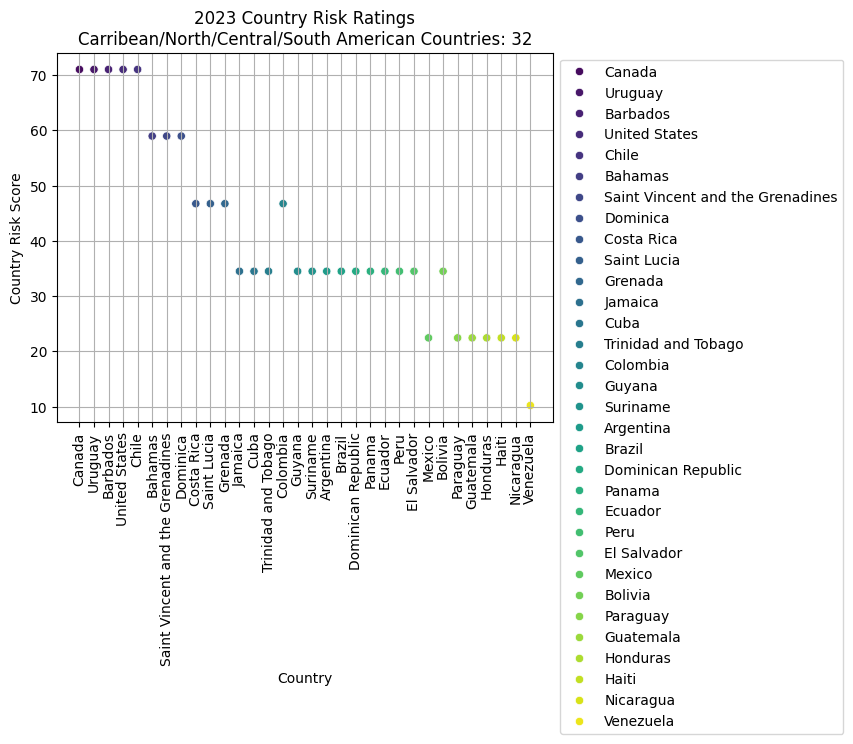

In [27]:
num_countries = len(americas_region.country__territory)

sns.scatterplot(data = americas_region, x = 'country__territory', y = 'global_insights_country_risk_ratings', hue = 'country__territory', palette = 'viridis')
plt.title(f'2023 Country Risk Ratings\nCarribean/North/Central/South American Countries: {num_countries}')
plt.xlabel('Country')
plt.ylabel('Country Risk Score')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor = (1,1))
plt.grid(True)
plt.show()

In [28]:
americas_region[['country__territory','global_insights_country_risk_ratings']]

country__territory  global_insights_country_risk_ratings
11                             Canada                              71.02245
17                            Uruguay                              71.02245
23                           Barbados                              71.02245
24                      United States                              71.02245
28                              Chile                              71.02245
29                            Bahamas                              58.97113
36   Saint Vincent and the Grenadines                              58.97113
41                           Dominica                              58.97113
44                         Costa Rica                              46.73721
45                        Saint Lucia                              46.73721
50                            Grenada                              46.73721
68                            Jamaica                              34.50329
77                               Cuba                              34.50329
81                Trinidad and Tobago                              34.50329
86                           Colombia                              46.73721
88                             Guyana                              34.50329
89                           Suriname                              34.50329
98                          Argentina                              34.50329
104                            Brazil                              34.50329
108                Dominican Republic                              34.50329
111                            Panama                              34.50329
114                           Ecuador                              34.50329
122                              Peru                              34.50329
125                       El Salvador                              34.50329
127                            Mexico                              22.45197
132                           Bolivia                              34.50329
138                          Paraguay                              22.45197
154                         Guatemala                              22.45197
155                          Honduras                              22.45197
172                             Haiti                              22.45197
174                         Nicaragua                              22.45197
178                         Venezuela                              10.21805

<h1>Correlation between CPI Score and Country Risk Rating </h1>

<p>From the correlation heatmap above, we can see that cpi_score_2023 and global_insights_country_risk_ratings have a correlation of <span style = 'color:blue'>0.93</span></p>

<p>Creating a scatter plot with a regression line to show the linear relationship</p>
<p>What this is showing is that if a Countrys CPI score is high (good) then its risk rating is also high(good to do business with)</p>

In [29]:
americas_region.global_insights_country_risk_ratings.unique()

array([71.02245, 58.97113, 46.73721, 34.50329, 22.45197, 10.21805])

<p>From the dataframe presented above we can see that there is not a lot of variety for the country risk rating column thus giving us vertical lines in the regression plot below</p>

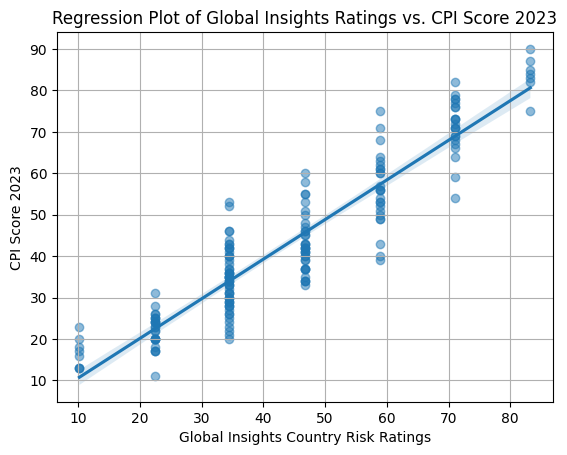

In [30]:
sns.regplot(data=dataset, x='global_insights_country_risk_ratings', y='cpi_score_2023', scatter_kws={'alpha':0.5})
plt.title('Regression Plot of Global Insights Ratings vs. CPI Score 2023')
plt.grid(True)
plt.xlabel('Global Insights Country Risk Ratings')
plt.ylabel('CPI Score 2023')
plt.show()